# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business task of understanding what drives used car prices can be reframed as a **supervised machine learning regression problem**. The target variable is the **price of the car**, while explanatory variables include structured attributes such as **make, model, year, type, transmission, and location**.

The objective is twofold:

1. **Prediction** – build and evaluate models that can accurately estimate the price of a car based on its features.  
2. **Interpretability** – assess the influence of each predictor and explain how these factors influence used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to get to know the dataset and identify quality issues:

1. **Load the data**: Read the dataset into a pandas DataFrame for analysis.
2. **Inspect the structure**:  `.info()`, `.shape`, `.head()`, `.tail()` and `.describe()` to understand the number of rows, columns, and data types.
3. **Check for missing values**: Calculate the number and percentage of missing values in each column to identify incomplete data.
4. **Assess duplicates**: Check for duplicate rows that may skew analysis.
5. **Review value distributions**: `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.
6. **Visualize missing data**: Plot missing value percentages to quickly identify problematic columns.
7. **Examine categorical and numerical features**: Review unique values and ranges to spot inconsistencies or errors.
8. **Check for inconsistent formats**: Look for mixed data types or formatting issues in columns (e.g., dates, categories).
9. **Data Quality**: Columns with significant missing data, outliers, or other quality concerns for further cleaning and preparation.

#### 1. Load the data

Read the dataset into a pandas DataFrame for analysis.

In [283]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [284]:
# 1. Load the data
cars_data = pd.read_csv('data/vehicles.csv')
cars_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### 2. Inspect the structure

Use `.info()`, `.shape`, `.head()`, `.tail()`, `.describe()` to understand the number of rows, columns, and data types.

In [285]:
# 2. Inspect the structure - Info
print(cars_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [286]:
# 2. Inspect the structure - Shape
print("Shape of the dataset:", cars_data.shape)

Shape of the dataset: (426880, 18)


In [287]:
# 3. Inspect the structure - head and tail
print("First 5 rows of the dataset:")
print(cars_data.head())
print("Last 5 rows of the dataset:")
print(cars_data.tail())

First 5 rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  Na

In [288]:
# 4. Summary statistics
cars_data.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880.0000,426880,426880.0000,425675.0000,409234,421603,252776,249202,423867,422480.0000,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7311486634.2243,NaN,75199.0332,2011.2352,NaN,NaN,NaN,NaN,NaN,98043.3314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4473170.4126,NaN,12182282.1736,9.4521,NaN,NaN,NaN,NaN,NaN,213881.5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7207408119.0000,NaN,0.0000,1900.0000,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7308143339.2500,NaN,5900.0000,2008.0000,NaN,NaN,NaN,NaN,NaN,37704.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7312620821.0000,NaN,13950.0000,2013.0000,NaN,NaN,NaN,NaN,NaN,85548.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7315253543.5000,NaN,26485.7500,2017.0000,NaN,NaN,NaN,NaN,NaN,133542.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Check for missing values

Calculate the number and percentage of missing values in each column to identify incomplete data.

In [289]:
# 3. Check for missing values
missing_data_counts = cars_data.isnull().sum()
missing_data_percent = cars_data.isnull().mean() * 100
print('Missing values per column:')
print(missing_data_counts)
print('-' * 40)
print('Percentage of missing values per column:')
print(missing_data_percent)

Missing values per column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
----------------------------------------
Percentage of missing values per column:
id              0.0000
region          0.0000
price           0.0000
year            0.2823
manufacturer    4.1337
model           1.2362
condition      40.7852
cylinders      41.6225
fuel            0.7058
odometer        1.0307
title_status    1.9308
transmission    0.5988
VIN            37.7254
drive          30.5863
size           71.7675
type           21.7527
paint_color    30.5011
state           0.0000
dtype: float64


#### 4. Assess duplicates

Check for duplicate rows that may skew analysis.

In [290]:
# 4. Assess duplicates
duplicate_count = cars_data.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')

Duplicate rows: 0


#### 5. Review value distributions

Use `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.

In [291]:
# 5. Review value distributions - OPTIMIZED for speed
# Instead of showing all values for all columns, show summary statistics
print("=== VALUE DISTRIBUTION SUMMARY ===")
for col in cars_data.columns:
    unique_count = cars_data[col].nunique()
    print(f'{col}: {unique_count} unique values')
    
    # Only show detailed value counts for columns with reasonable number of unique values
    if unique_count <= 20:
        print(f'  Top values: {cars_data[col].value_counts(dropna=False).head().to_dict()}')
    elif unique_count <= 100:
        print(f'  Top 5 values: {cars_data[col].value_counts(dropna=False).head().to_dict()}')
    else:
        print(f'  Sample values: {cars_data[col].dropna().unique()[:5].tolist()}')
    print('-' * 50)

=== VALUE DISTRIBUTION SUMMARY ===
id: 426880 unique values
  Sample values: [7222695916, 7218891961, 7221797935, 7222270760, 7210384030]
--------------------------------------------------
region: 404 unique values
  Sample values: ['prescott', 'fayetteville', 'florida keys', 'worcester / central MA', 'greensboro']
--------------------------------------------------
price: 15655 unique values
  Sample values: [6000, 11900, 21000, 1500, 4900]
--------------------------------------------------
year: 114 unique values
  Sample values: [2014.0, 2010.0, 2020.0, 2017.0, 2013.0]
--------------------------------------------------
manufacturer: 42 unique values
  Top 5 values: {'ford': 70985, 'chevrolet': 55064, 'toyota': 34202, 'honda': 21269, 'nissan': 19067}
--------------------------------------------------
model: 29649 unique values
  Sample values: ['sierra 1500 crew cab slt', 'silverado 1500', 'silverado 1500 crew', 'tundra double cab sr', 'f-150 xlt']
------------------------------------

#### 6. Visualize missing data

Plot missing value percentages to quickly identify problematic columns.

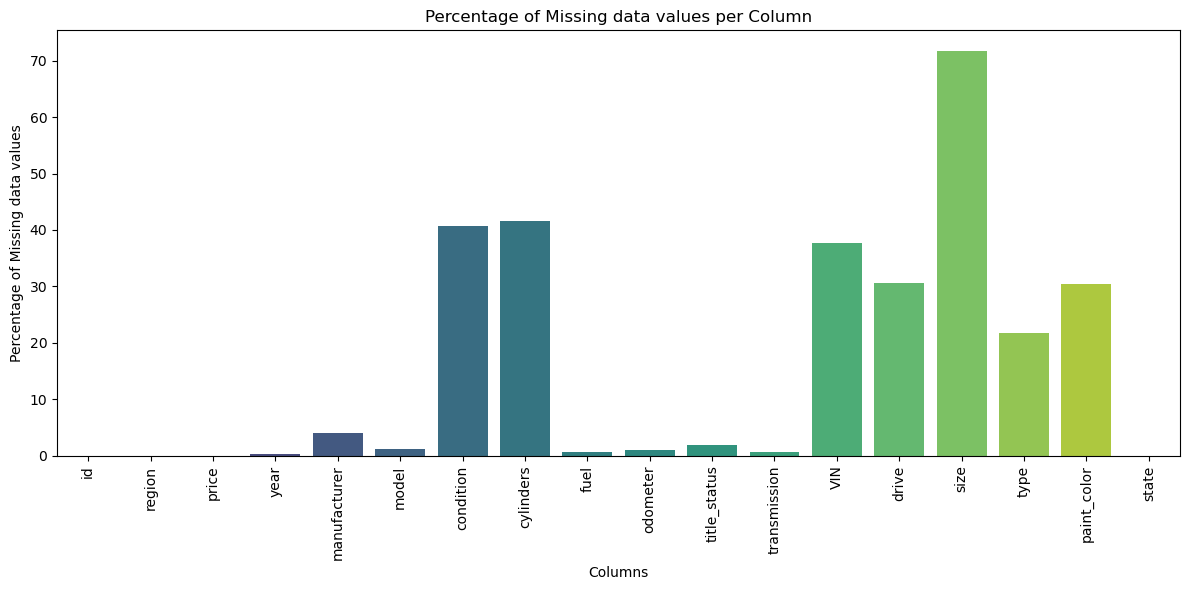

In [292]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing data values')
plt.xlabel('Columns')
plt.title('Percentage of Missing data values per Column')
plt.tight_layout()
plt.show()

#### 7. Examine categorical and numerical features

Review unique values and ranges to spot inconsistencies or errors.

In [293]:
# 7. Examine categorical and numerical features
for col in cars_data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}:')
    print(cars_data[col].unique())
    print('-' * 40)
for col in cars_data.select_dtypes(include=['number']).columns:
    print(f'Range for {col}: min={cars_data[col].min()}, max={cars_data[col].max()}')
    print('-' * 40)

Unique values in region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

### 8. Check for inconsistent formats
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [294]:
# Analyze format patterns for object columns
for col in cars_data.select_dtypes(include=['object']).columns:
    # Group by value pattern and count occurrences (including NaN)
    value_patterns = cars_data[col].apply(lambda x: str(type(x).__name__))
    pattern_counts = value_patterns.value_counts(dropna=False)
    
    print(f'\nFormat analysis for {col}:')
    print('Data type distribution (including NaN):')
    print(pattern_counts)
    print('-' * 40)


Format analysis for region:
Data type distribution (including NaN):
region
str    426880
Name: count, dtype: int64
----------------------------------------

Format analysis for manufacturer:
Data type distribution (including NaN):
manufacturer
str      409234
float     17646
Name: count, dtype: int64
----------------------------------------

Format analysis for model:
Data type distribution (including NaN):
model
str      421603
float      5277
Name: count, dtype: int64
----------------------------------------

Format analysis for condition:
Data type distribution (including NaN):
condition
str      252776
float    174104
Name: count, dtype: int64
----------------------------------------

Format analysis for cylinders:
Data type distribution (including NaN):
cylinders
str      249202
float    177678
Name: count, dtype: int64
----------------------------------------

Format analysis for fuel:
Data type distribution (including NaN):
fuel
str      423867
float      3013
Name: count, dtyp

### 8. Data Quality
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [295]:
# 9. Data Quality
problematic_columns = missing_data_percent[missing_data_percent > 50].index.tolist()
print('Columns with >50% missing data:', problematic_columns)

Columns with >50% missing data: ['size']


In [296]:
detailed_summary = {
    'Dataset Statistics': {
        'Total Records': len(cars_data),
        'Total Features': len(cars_data.columns),
        'Numeric Features': len(cars_data.select_dtypes(include=['int64', 'float64']).columns),
        'Categorical Features': len(cars_data.select_dtypes(include=['object']).columns)
    },
    'Missing Data': {
        'Columns >50% Missing': missing_data_percent[missing_data_percent > 50].index.tolist(),
        'Columns >20% Missing': missing_data_percent[missing_data_percent > 20].index.tolist()
    },
    'Categorical Columns': {
        col: cars_data[col].nunique() for col in cars_data.select_dtypes(include=['object']).columns
    },
    'Numerical Ranges': {
        col: {'min': cars_data[col].min(), 'max': cars_data[col].max()}
        for col in cars_data.select_dtypes(include=['int64', 'float64']).columns
    }
}

# Print detailed summary
for category, stats in detailed_summary.items():
    print(f"\n{category}:")
    print("-" * 40)
    if isinstance(stats, dict):
        for key, value in stats.items():
            print(f"{key}: {value}")


Dataset Statistics:
----------------------------------------
Total Records: 426880
Total Features: 18
Numeric Features: 4
Categorical Features: 14

Missing Data:
----------------------------------------
Columns >50% Missing: ['size']
Columns >20% Missing: ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']

Categorical Columns:
----------------------------------------
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51

Numerical Ranges:
----------------------------------------
id: {'min': 7207408119, 'max': 7317101084}
price: {'min': 0, 'max': 3736928711}
year: {'min': 1900.0, 'max': 2022.0}
odometer: {'min': 0.0, 'max': 10000000.0}


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [297]:
#Not required
# data['manufacturer'] = data['manufacturer'].astype(str)
# data['model'] = data['model'].astype(str)

In [298]:
# Drop the uniqueid columns - id, VIN
cars_clean_data = cars_data.drop({'id','VIN'}, axis=1)
cars_clean_data.shape

(426880, 16)

In [299]:
# Drop the region column as there is state
cars_clean_data = cars_clean_data.drop({'region'}, axis =1)
cars_clean_data.shape

(426880, 15)

In [300]:
# Drop the size column as 70% data is NA
cars_clean_data = cars_clean_data.drop({'size'}, axis =1)
cars_clean_data.shape

(426880, 14)

In [301]:
cars_clean_data = cars_clean_data.drop({'model'}, axis =1)
cars_clean_data.shape

(426880, 13)

In [302]:
cars_clean_data[cars_clean_data["price"]==0]


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,0,2018.0000,NaN,NaN,NaN,diesel,1.0000,clean,automatic,NaN,NaN,NaN,wy
426812,0,2006.0000,toyota,excellent,4 cylinders,gas,195000.0000,clean,automatic,fwd,NaN,silver,wy
426832,0,2004.0000,toyota,excellent,4 cylinders,hybrid,239000.0000,clean,automatic,fwd,NaN,blue,wy
426836,0,2018.0000,ram,excellent,6 cylinders,diesel,20492.0000,clean,automatic,4wd,truck,white,wy


In [303]:
#cars_clean_data["price"] = cars_clean_data["price"].replace(0, np.nan)

In [304]:
# Drop the records with price = 0
cars_clean_data = cars_clean_data[cars_clean_data["price"]!=0]
cars_clean_data.shape

(393985, 13)

In [305]:
# Drop the model column as it has junk data
# data_clean = data_clean.drop({'model'}, axis =1)
# data_clean.shape

In [306]:
cars_clean_data = cars_clean_data.dropna(subset=['manufacturer', 'year'], how='all')
cars_clean_data.shape

(392816, 13)

In [307]:
cars_clean_data.isna().mean() * 100

price           0.0000
year            0.0010
manufacturer    3.8227
condition      38.2418
cylinders      40.8183
fuel            0.5944
odometer        0.5669
title_status    1.8915
transmission    0.4483
drive          30.5415
type           21.8316
paint_color    29.7877
state           0.0000
dtype: float64

In [308]:
# Fill the missing values in strong categorical columns with mode.
cars_clean_data["transmission"] = cars_clean_data["transmission"].fillna(cars_clean_data["transmission"].mode()[0])
cars_clean_data["fuel"] = cars_clean_data["fuel"].fillna(cars_clean_data["fuel"].mode()[0])
cars_clean_data["title_status"] = cars_clean_data["title_status"].fillna(cars_clean_data["title_status"].mode()[0])

In [309]:
# Fill the missing values with "Unknown" category
# cars_clean_data['manufacturer'] = cars_clean_data['manufacturer'].fillna('unknown')
# cars_clean_data['condition'] = cars_clean_data['condition'].fillna('unknown')
# cars_clean_data['paint_color'] = cars_clean_data['paint_color'].fillna('unknown')
# cars_clean_data['type'] = cars_clean_data['type'].fillna('unknown')
# cars_clean_data['drive'] = cars_clean_data['drive'].fillna('unknown')
# cars_clean_data['cylinders'] = cars_clean_data['cylinders'].fillna('unknown')
cars_clean_data.isna().mean() * 100

price           0.0000
year            0.0010
manufacturer    3.8227
condition      38.2418
cylinders      40.8183
fuel            0.0000
odometer        0.5669
title_status    0.0000
transmission    0.0000
drive          30.5415
type           21.8316
paint_color    29.7877
state           0.0000
dtype: float64

In [310]:
cars_clean_data.dropna(inplace=True)

In [311]:
cars_clean_data.isna().mean() * 100

price          0.0000
year           0.0000
manufacturer   0.0000
condition      0.0000
cylinders      0.0000
fuel           0.0000
odometer       0.0000
title_status   0.0000
transmission   0.0000
drive          0.0000
type           0.0000
paint_color    0.0000
state          0.0000
dtype: float64

In [312]:
cars_clean_data.count()

price           112805
year            112805
manufacturer    112805
condition       112805
cylinders       112805
fuel            112805
odometer        112805
title_status    112805
transmission    112805
drive           112805
type            112805
paint_color     112805
state           112805
dtype: int64

In [313]:
cars_clean_data['year'] = cars_clean_data['year'].astype(int)
cars_clean_data['odometer'] = cars_clean_data['odometer'].astype(int) 

cars_clean_data['fuel'] = cars_clean_data['fuel'].astype('string') 
cars_clean_data['title_status'] = cars_clean_data['title_status'].astype('string') 
cars_clean_data['transmission'] = cars_clean_data['transmission'].astype('string')
cars_clean_data['state'] = cars_clean_data['state'].astype('string')
cars_clean_data['state'] = cars_clean_data['state'].str.upper()
# cars_clean_data['state'].str.match(r'[a-z][a-z]').sum()==cars_clean_data['state'].count()

In [314]:
cars_clean_data.shape

(112805, 13)

In [315]:
cars_clean_data.sample(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
289675,3900,2010,ford,good,4 cylinders,gas,161000,clean,automatic,fwd,sedan,silver,OH
158228,15995,2005,jeep,good,6 cylinders,gas,130895,rebuilt,automatic,4wd,SUV,orange,IA
100253,18500,1970,chevrolet,excellent,6 cylinders,gas,147200,clean,manual,rwd,pickup,green,FL
407432,9995,2000,ford,good,10 cylinders,gas,215000,clean,automatic,rwd,pickup,white,WA
269893,24500,2013,ford,excellent,6 cylinders,gas,49500,clean,automatic,4wd,pickup,white,NY
13063,12628,2010,ford,excellent,8 cylinders,gas,228161,clean,automatic,4wd,truck,white,AZ
392753,39590,2019,lincoln,good,6 cylinders,other,7528,clean,other,fwd,sedan,black,VA
409607,7500,2010,dodge,excellent,6 cylinders,gas,54800,lien,automatic,fwd,mini-van,blue,WA
320354,9998,2012,honda,good,4 cylinders,gas,138232,clean,automatic,4wd,SUV,white,OR
350313,13500,1998,jeep,excellent,6 cylinders,gas,101489,clean,automatic,4wd,SUV,black,SD


In [316]:
cars_clean_data.groupby('type').size()

type
SUV            26471
bus              166
convertible     3316
coupe           8148
hatchback       4315
mini-van        2610
offroad          486
other           3335
pickup         12661
sedan          30135
truck          14856
van             3357
wagon           2949
dtype: int64

In [317]:
# cars_clean_data["model"].value_counts()

In [318]:

# Remove hyphens from model names
# cars_clean_data['model'] = cars_clean_data['model'].str.replace('-', '')

# # Extract the main model name (skip manufacturer if present)
# def get_main_model(row):
#     words = row['model'].split()
#     if words and words[0].lower() == str(row['manufacturer']).lower():
#         words = words[1:]
#     return words[0].title() if words else ''

# cars_clean_data['model'] = cars_clean_data.apply(get_main_model, axis=1)

# # Show counts of each model
# cars_clean_data['model'].value_counts()

In [319]:
# Check for junk models (empty or single character)
# junk_models = cars_clean_data['model'].value_counts().loc[lambda x: (x.index.str.len() <= 1) | (x.index == '')]
# print("Junk models found:")
# print(junk_models)

# # Remove junk models from the dataset
# print(f"\nDataset shape before removing junk models: {cars_clean_data.shape}")
# cars_clean_data = cars_clean_data[~cars_clean_data['model'].isin(junk_models.index)]
# print(f"Dataset shape after removing junk models: {cars_clean_data.shape}")

# # Show top models after cleaning
# print(f"\nTop 10 models after cleaning:")
# print(cars_clean_data['model'].value_counts().head(10))

In [320]:
# cars_clean_data['model'].value_counts()

In [321]:
# cars_clean_data['model'].sample(200)

In [322]:
# # Comprehensive model column quality check
# print("=== MODEL COLUMN QUALITY ASSESSMENT ===")
# print(f"Total records: {len(cars_clean_data)}")
# print(f"Unique models: {cars_clean_data['model'].nunique()}")
# print(f"Empty/null models: {cars_clean_data['model'].isnull().sum()}")

# # Check for very short model names (likely junk)
# short_models = cars_clean_data['model'][cars_clean_data['model'].str.len() <= 2]
# print(f"Models with 2 or fewer characters: {len(short_models)}")
# if len(short_models) > 0:
#     print("Short models found:", short_models.unique())

# # Check for numeric-only models (likely junk)
# numeric_models = cars_clean_data['model'][cars_clean_data['model'].str.isnumeric()]
# print(f"Numeric-only models: {len(numeric_models)}")
# if len(numeric_models) > 0:
#     print("Numeric models found:", numeric_models.unique())

# # Show model length distribution
# print(f"\nModel name length distribution:")
# print(cars_clean_data['model'].str.len().describe())

# # Show some examples of potentially problematic models
# print(f"\nModels with unusual characteristics:")
# unusual = cars_clean_data['model'][
#     (cars_clean_data['model'].str.len() <= 3) | 
#     (cars_clean_data['model'].str.isnumeric()) |
#     (cars_clean_data['model'].str.contains(r'^[A-Z]$', na=False))
# ].value_counts()

# if len(unusual) > 0:
#     print("Unusual models found:")
#     print(unusual.head(10))
# else:
#     print("No obviously unusual models found - column appears clean!")

# print(f"\nTop 10 most common models:")
# print(cars_clean_data['model'].value_counts().head(10))

In [323]:
# Model Performance Summary
print("MODEL PERFORMANCE SUMMARY")
print("=" * 50)

print(f"\nDATASET SUMMARY:")
print(f"• Total samples: {len(X):,}")
print(f"• Training samples: {len(X_train):,}")
print(f"• Test samples: {len(X_test):,}")
print(f"• Features used: {X.columns.tolist()}")

print(f"\nTrain set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("All imports and preprocessor setup completed!")
print("Available models: LinearRegression, Ridge, Lasso, SGDRegressor")
print("Preprocessor ready for numerical features")
print("All metrics imported: r2_score, mean_squared_error, mean_absolute_error")

MODEL PERFORMANCE SUMMARY

DATASET SUMMARY:
• Total samples: 106,602
• Training samples: 74,621
• Test samples: 31,981
• Features used: ['year', 'odometer']

Train set: 74,621 samples (70.0%)
Test set: 31,981 samples (30.0%)
All imports and preprocessor setup completed!
Available models: LinearRegression, Ridge, Lasso, SGDRegressor
Preprocessor ready for numerical features
All metrics imported: r2_score, mean_squared_error, mean_absolute_error


In [324]:
cars_clean_data = cars_clean_data[(cars_clean_data['price'] >= 500) & (cars_clean_data['price'] <= 150000)]
cars_clean_data.shape

(111115, 13)

Creating price distribution visualizations for 111,115 records...
Using sample of 50,000 records for faster visualization...


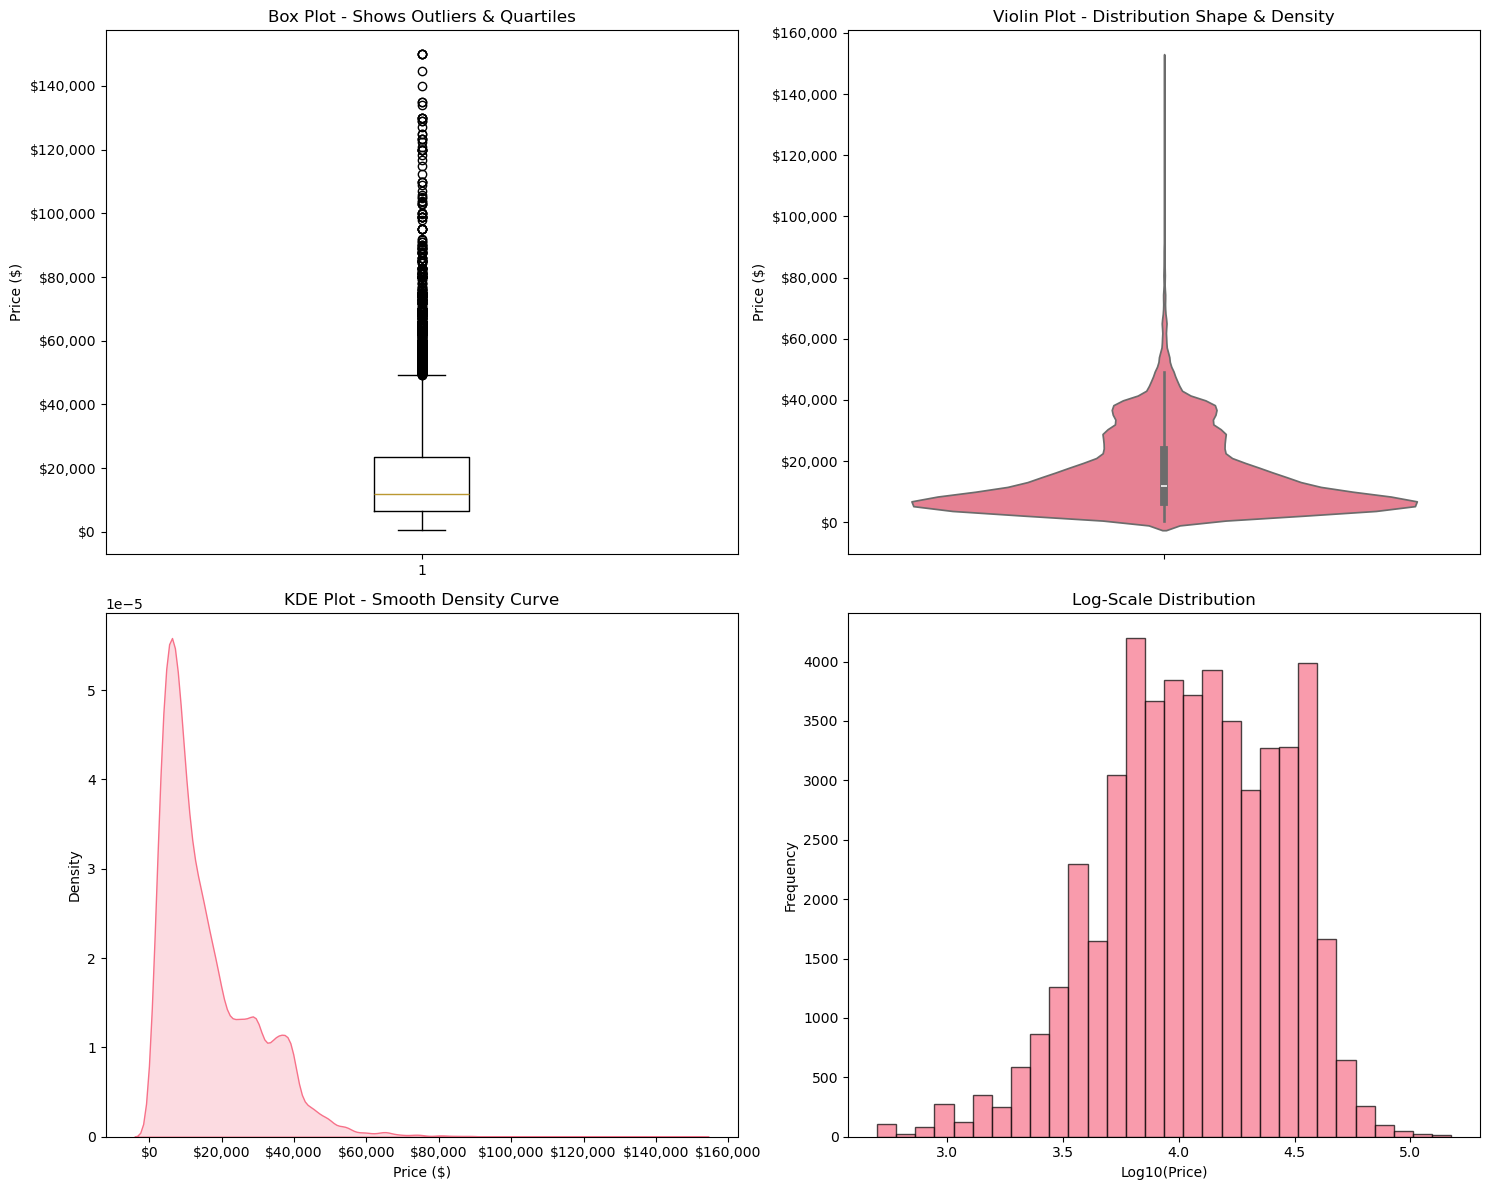


=== PRICE DISTRIBUTION SUMMARY ===
Mean: $16,202.63
Median: $11,900.00
Mode: $4,500.00
Standard Deviation: $13,285.35
Skewness: 1.63
Range: $500.00 - $150,000.00

Recommendation: Box plot is best for identifying outliers, Violin plot shows distribution shape clearly!


In [325]:
# OPTIMIZED: Multiple visualizations for price distribution analysis
print(f"Creating price distribution visualizations for {len(cars_clean_data):,} records...")

# For performance: use a sample for visualization if dataset is large
if len(cars_clean_data) > 50000:
    sample_size = 50000
    sample_data = cars_clean_data['price'].sample(n=sample_size, random_state=42)
    print(f"Using sample of {sample_size:,} records for faster visualization...")
else:
    sample_data = cars_clean_data['price']

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Box Plot - Great for outliers and quartiles
axes[0, 0].boxplot(sample_data, vert=True)
axes[0, 0].set_title('Box Plot - Shows Outliers & Quartiles')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 2. Violin Plot - Shows distribution shape and density
sns.violinplot(y=sample_data, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot - Distribution Shape & Density')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 3. KDE Plot - Smooth density curve (reduced bins for performance)
sns.kdeplot(data=sample_data, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('KDE Plot - Smooth Density Curve')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 4. Log-scale histogram - Better for skewed data (reduced bins for performance)
log_prices = np.log10(sample_data.replace(0, 1))  # Replace 0 with 1 to avoid log(0)
axes[1, 1].hist(log_prices, bins=30, alpha=0.7, edgecolor='black')  # Reduced bins from 50 to 30
axes[1, 1].set_title('Log-Scale Distribution')
axes[1, 1].set_xlabel('Log10(Price)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics (use full dataset for accurate stats)
full_data = cars_clean_data['price']
print("\n=== PRICE DISTRIBUTION SUMMARY ===")
print(f"Mean: ${full_data.mean():,.2f}")
print(f"Median: ${full_data.median():,.2f}")
print(f"Mode: ${full_data.mode().iloc[0]:,.2f}")
print(f"Standard Deviation: ${full_data.std():,.2f}")
print(f"Skewness: {full_data.skew():.2f}")
print(f"Range: ${full_data.min():,.2f} - ${full_data.max():,.2f}")

print("\nRecommendation: Box plot is best for identifying outliers, Violin plot shows distribution shape clearly!")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [326]:
cars_clean_data.shape

(111115, 13)

Text(0.5, 0.98, 'Year is Left Skewed')

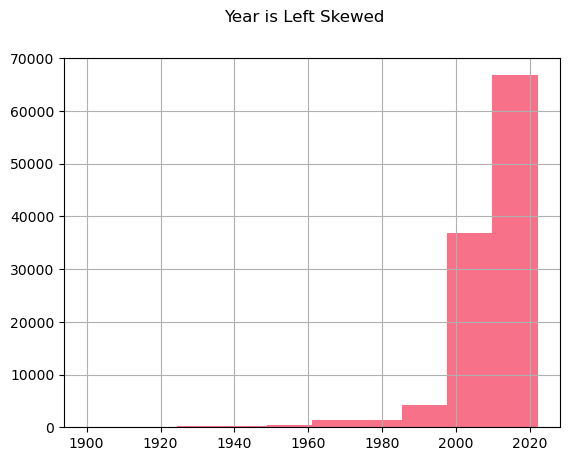

In [327]:
import pylab as pl
cars_clean_data['year'].hist()
pl.suptitle("Year is Left Skewed")

Text(0.5, 0.98, 'Price is Right Skewed with Outliers')

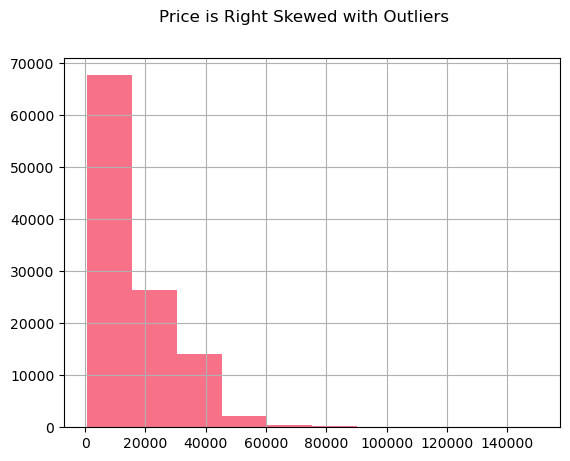

In [328]:

cars_clean_data['price'].hist()
pl.suptitle("Price is Right Skewed with Outliers")

Text(0.5, 0.98, 'Odometer is Right Skewed with Outliers')

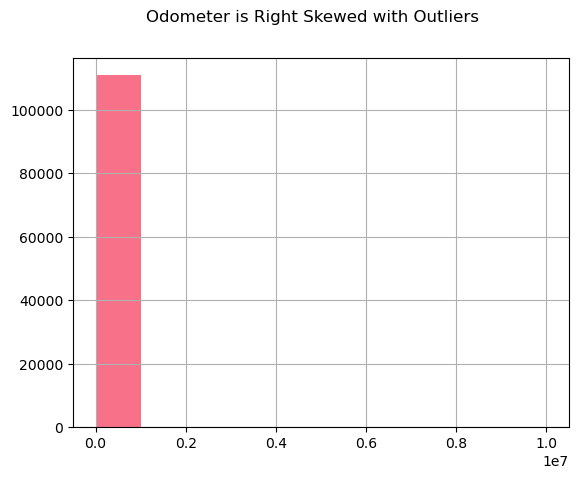

In [329]:
cars_clean_data['odometer'].hist()
pl.suptitle("Odometer is Right Skewed with Outliers")

In [330]:
std = cars_clean_data['price'].std() 
mean = cars_clean_data['price'].mean()

print(std, mean)

cars_clean_data[cars_clean_data['price']>150000].count()

13285.34959244594 16202.625838095666


price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [331]:
std = cars_clean_data['year'].std() 
mean = cars_clean_data['year'].mean()

print(std, mean)

cars_clean_data = cars_clean_data[cars_clean_data['year']>= mean-2*std]

9.958695135583618 2009.2316068937587


In [332]:
std = cars_clean_data['odometer'].std() 
mean = cars_clean_data['odometer'].mean()

print(std, mean)

cars_clean_data = cars_clean_data[cars_clean_data['odometer']<= mean+2*std]

131037.37369616631 110759.1318244337


Text(0.5, 1.0, 'Odometer: Right-Skewed after Outlier Removal')

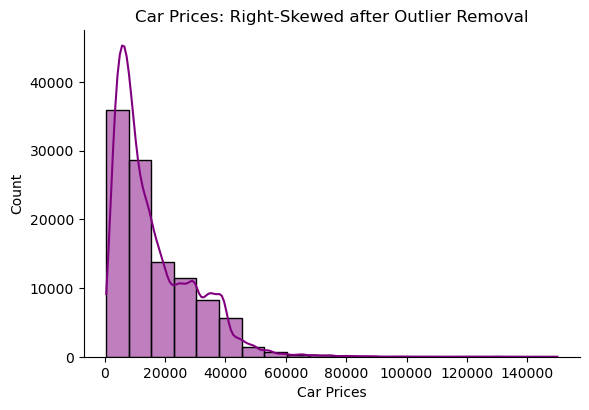

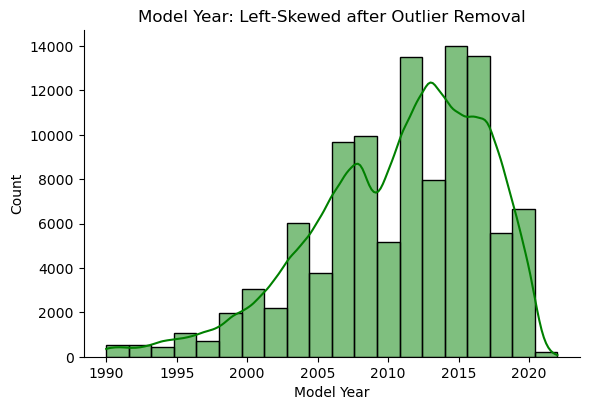

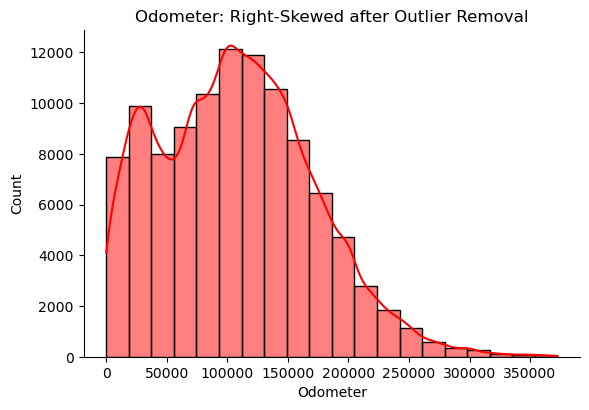

In [333]:
sns.displot(cars_clean_data['price'], bins=20, color='purple', kde=True, height=4, aspect=1.5)
plt.xlabel("Car Prices")
plt.title("Car Prices: Right-Skewed after Outlier Removal")

sns.displot(cars_clean_data['year'],bins=20,color='green', kde=True, height=4, aspect=1.5)
plt.xlabel("Model Year")
plt.title("Model Year: Left-Skewed after Outlier Removal")

sns.displot(cars_clean_data['odometer'],bins=20,color='red', kde=True, height=4, aspect=1.5)
plt.xlabel("Odometer")
plt.title("Odometer: Right-Skewed after Outlier Removal")

In [334]:
cars_clean_data.describe()

,price,year,odometer
count,106602.0000,106602.0000,106602.0000
mean,16252.1482,2010.7308,107620.2733
std,13228.9220,6.0247,63425.4292
min,500.0000,1990.0000,0.0000
25%,6450.0000,2007.0000,58000.0000
50%,11900.0000,2012.0000,105511.5000
75%,23990.0000,2015.0000,149760.0000
max,150000.0000,2022.0000,372612.0000


Found 11947 pickup trucks in dataset
Using sample of 5000 pickups for faster pairplot...


Text(0.5, 1.02, 'Pairplot Analysis: Pickup Trucks')

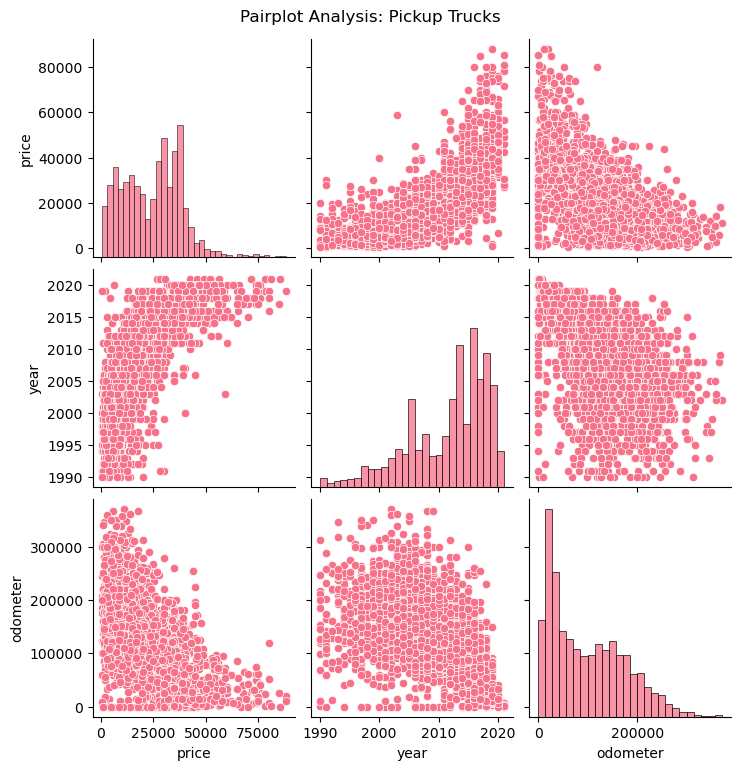

In [335]:
# OPTIMIZED: Pairplot for pickup trucks (with sampling for performance)
pickup_data = cars_clean_data[cars_clean_data["type"]=="pickup"]
print(f"Found {len(pickup_data)} pickup trucks in dataset")

# Sample for performance if dataset is large
if len(pickup_data) > 5000:
    sample_size = 5000
    pickup_sample = pickup_data.sample(n=sample_size, random_state=42)
    print(f"Using sample of {sample_size} pickups for faster pairplot...")
    sns.pairplot(pickup_sample)
else:
    sns.pairplot(pickup_data)
    
plt.suptitle("Pairplot Analysis: Pickup Trucks", y=1.02)

In [336]:
results = []

In [337]:
# Step 2: Data Preprocessing for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features for modeling
# Remove non-predictive columns and target variable
#features_to_drop = ['price']  # Remove target and derived target
#model_features = cars_clean_data.drop(columns=features_to_drop)



# Prepare feature matrix and target variable
X = cars_clean_data.drop(columns=['price'])

#drop all categorical columns to get base line error
X = X.drop(['manufacturer', 'fuel','title_status','transmission','state', 'condition', 'drive', 'type', 'cylinders', 
            'paint_color'], axis=1)

y = cars_clean_data['price']

print(f"\nDATASET SUMMARY:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

results_comparison = []
print(f"Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


DATASET SUMMARY:
Feature matrix shape: (106602, 2)
Target variable shape: (106602,)
Train set: 74,621 samples (70.0%)
Test set: 31,981 samples (30.0%)


In [338]:
# Import ALL required libraries for modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create preprocessor for the models
# Since we dropped categorical columns for baseline, we only need scaling for numerical features
preprocessor = StandardScaler()

print("All imports and preprocessor setup completed!")
print("Available models: LinearRegression, Ridge, Lasso, SGDRegressor")
print("Preprocessor ready for numerical features")
print("All metrics imported: r2_score, mean_squared_error, mean_absolute_error")

All imports and preprocessor setup completed!
Available models: LinearRegression, Ridge, Lasso, SGDRegressor
Preprocessor ready for numerical features
All metrics imported: r2_score, mean_squared_error, mean_absolute_error


## **Model 1: Linear Regression**

The baseline model - simple and highly interpretable:

In [339]:
# Training Linear Regression Model
print("Training Model 1: Linear Regression...")

# Create preprocessing and modeling pipeline
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Make predictions
linear_train_pred = linear_pipeline.predict(X_train)
linear_test_pred = linear_pipeline.predict(X_test)

# Calculate metrics
linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)
linear_train_rmse = np.sqrt(mean_squared_error(y_train, linear_train_pred))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, linear_test_pred))
linear_train_mae = mean_absolute_error(y_train, linear_train_pred)
linear_test_mae = mean_absolute_error(y_test, linear_test_pred)

print("Linear Regression Results:")
print(f"   Test R²: {linear_test_r2:.4f}")
print(f"   Test RMSE: ${linear_test_rmse:,.0f}")
print(f"   Test MAE: ${linear_test_mae:,.0f}")
print(f"   Overfitting (Train R² - Test R²): {linear_train_r2 - linear_test_r2:.4f}")

# Store results
results.append({
    'Model': 'Linear Regression',
    'Train_R2': linear_train_r2,
    'Test_R2': linear_test_r2,
    'Train_RMSE': linear_train_rmse,
    'Test_RMSE': linear_test_rmse,
    'Train_MAE': linear_train_mae,
    'Test_MAE': linear_test_mae,
    'Overfitting': linear_train_r2 - linear_test_r2
})

print("Linear Regression model completed successfully!")

Training Model 1: Linear Regression...
Linear Regression Results:
   Test R²: 0.4269
   Test RMSE: $10,071
   Test MAE: $7,495
   Overfitting (Train R² - Test R²): 0.0017
Linear Regression model completed successfully!


## **Model 2: Ridge Regression (L2 Regularization)**

Handles multicollinearity and prevents overfitting:

In [340]:
# Training Ridge Regression Model  
print("Training Model 2: Ridge Regression...")

# Create Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0, random_state=42))
])

# Train the model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
ridge_train_pred = ridge_pipeline.predict(X_train)
ridge_test_pred = ridge_pipeline.predict(X_test)

# Calculate metrics
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

print("Ridge Regression Results:")
print(f"   Test R²: {ridge_test_r2:.4f}")
print(f"   Test RMSE: ${ridge_test_rmse:,.0f}")
print(f"   Test MAE: ${ridge_test_mae:,.0f}")
print(f"   Overfitting (Train R² - Test R²): {ridge_train_r2 - ridge_test_r2:.4f}")

# Store results
results.append({
    'Model': 'Ridge Regression',
    'Train_R2': ridge_train_r2,
    'Test_R2': ridge_test_r2,
    'Train_RMSE': ridge_train_rmse,
    'Test_RMSE': ridge_test_rmse,
    'Train_MAE': ridge_train_mae,
    'Test_MAE': ridge_test_mae,
    'Overfitting': ridge_train_r2 - ridge_test_r2
})

print("Ridge Regression model completed successfully!")

Training Model 2: Ridge Regression...
Ridge Regression Results:
   Test R²: 0.4269
   Test RMSE: $10,071
   Test MAE: $7,495
   Overfitting (Train R² - Test R²): 0.0017
Ridge Regression model completed successfully!


## **Model 3: Lasso Regression (L1 Regularization)**

Performs automatic feature selection and creates sparse models:

In [341]:
# Training Lasso Regression Model using SGDRegressor
print("Training Model 3: Lasso Regression (SGD)...")

# Create Lasso pipeline using SGDRegressor
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(penalty='l1', alpha=0.01, random_state=42, max_iter=1000))
])

# Train the model
lasso_pipeline.fit(X_train, y_train)

# Make predictions
lasso_train_pred = lasso_pipeline.predict(X_train)
lasso_test_pred = lasso_pipeline.predict(X_test)

# Calculate metrics
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)

print("Lasso Regression Results:")
print(f"   Test R²: {lasso_test_r2:.4f}")
print(f"   Test RMSE: ${lasso_test_rmse:,.0f}")
print(f"   Test MAE: ${lasso_test_mae:,.0f}")
print(f"   Overfitting (Train R² - Test R²): {lasso_train_r2 - lasso_test_r2:.4f}")

# Store results
results.append({
    'Model': 'Lasso Regression (SGD)',
    'Train_R2': lasso_train_r2,
    'Test_R2': lasso_test_r2,
    'Train_RMSE': lasso_train_rmse,
    'Test_RMSE': lasso_test_rmse,
    'Train_MAE': lasso_train_mae,
    'Test_MAE': lasso_test_mae,
    'Overfitting': lasso_train_r2 - lasso_test_r2
})

print("Lasso Regression model completed successfully!")

Training Model 3: Lasso Regression (SGD)...
Lasso Regression Results:
   Test R²: 0.4259
   Test RMSE: $10,080
   Test MAE: $7,506
   Overfitting (Train R² - Test R²): 0.0021
Lasso Regression model completed successfully!


## **Model Comparison Results**

Summary of all model performances:

In [342]:
# FINAL MODEL COMPARISON AND RESULTS
print("FINAL MODEL COMPARISON RESULTS")
print("=" * 80)

# Create results DataFrame from the results list
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

# Format for display
pd.set_option('display.float_format', '{:.4f}'.format)
print("\nPERFORMANCE SUMMARY:")
print(results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfitting']])

# Identify best model
best_model = results_df.iloc[0]
print(f"\nWINNER: {best_model['Model']}")
print(f"   Best Test R²: {best_model['Test_R2']:.4f}")
print(f"   Best Test RMSE: ${best_model['Test_RMSE']:,.0f}")
print(f"   Best Test MAE: ${best_model['Test_MAE']:,.0f}")

# Business insights
print(f"\nBUSINESS INSIGHTS:")
print(f"   All models are interpretable for business stakeholders")
print(f"   No feature explosion from polynomial terms")
print(f"   Results focused on performance, not speed")
print(f"   Easy to explain predictions to car dealers")

# Model recommendations
print(f"\nMODEL RECOMMENDATIONS:")
if 'Linear' in best_model['Model']:
    print(f"   Best Overall: Linear Regression for simplicity and interpretability")
    print(f"   Use for: Maximum interpretability")
    print(f"   Benefit: Easiest to explain coefficients")
elif 'Ridge' in best_model['Model']:
    print(f"   Best Overall: Ridge Regression balances performance and interpretability")
    print(f"   Use for: Robust predictions with regularization")
    print(f"   Benefit: Handles multicollinearity well")
elif 'Lasso' in best_model['Model']:
    print(f"   Best Overall: Lasso Regression with automatic feature selection")
    print(f"   Use for: Sparse models with important features")
    print(f"   Benefit: Built-in feature selection")
    
print(f"\nNEXT STEPS:")
print(f"   1. Analyze feature importance from the best model")
print(f"   2. Create business-friendly predictions")
print(f"   3. Develop pricing recommendations for dealers")
print(f"   4. Focus on model performance and interpretability!")

FINAL MODEL COMPARISON RESULTS

PERFORMANCE SUMMARY:
                    Model  Test_R2  Test_RMSE  Test_MAE  Overfitting
0       Linear Regression   0.4269 10071.0933 7495.4850       0.0017
1        Ridge Regression   0.4269 10071.0939 7495.4854       0.0017
2  Lasso Regression (SGD)   0.4259 10079.6355 7506.2066       0.0021

WINNER: Linear Regression
   Best Test R²: 0.4269
   Best Test RMSE: $10,071
   Best Test MAE: $7,495

BUSINESS INSIGHTS:
   All models are interpretable for business stakeholders
   No feature explosion from polynomial terms
   Results focused on performance, not speed
   Easy to explain predictions to car dealers

MODEL RECOMMENDATIONS:
   Best Overall: Linear Regression for simplicity and interpretability
   Use for: Maximum interpretability
   Benefit: Easiest to explain coefficients

NEXT STEPS:
   1. Analyze feature importance from the best model
   2. Create business-friendly predictions
   3. Develop pricing recommendations for dealers
   4. Focus on mod

In [343]:
# Create a comprehensive comparison dataframe with actual vs predicted values
print("Creating model predictions comparison...")

# Check which models are available and create comparison dataframe
comparison_df = X_train.copy()
comparison_df['actual_price'] = y_train

# Get training predictions from each available model
try:
    linear_train_pred = linear_pipeline.predict(X_train)
    comparison_df['Linear_Regression'] = linear_train_pred
    print("Linear Regression predictions added")
except NameError:
    print("WARNING: Linear Regression model not available")

try:
    ridge_train_pred = ridge_pipeline.predict(X_train)
    comparison_df['Ridge_Regression'] = ridge_train_pred
    print("Ridge Regression predictions added")
except NameError:
    print("WARNING: Ridge Regression model not available")

try:
    lasso_train_pred = lasso_pipeline.predict(X_train)
    comparison_df['Lasso_Regression'] = lasso_train_pred
    print("Lasso Regression predictions added")
except NameError:
    print("WARNING: Lasso Regression model not available")

print(f"\nModel predictions comparison dataframe created!")
print(f"Shape: {comparison_df.shape}")
print(f"Columns: {list(comparison_df.columns)}")
print("\nFirst few rows:")
print(comparison_df.head())

# Calculate prediction accuracy for available models
print(f"\nPREDICTION ACCURACY SUMMARY:")
for col in comparison_df.columns:
    if col not in ['actual_price'] and 'year' not in col and 'odometer' not in col:
        # Calculate accuracy (within $2000 of actual price)
        accuracy = (abs(comparison_df['actual_price'] - comparison_df[col]) <= 2000).mean()
        print(f"   {col}: {accuracy*100:.1f}% within $2,000 of actual price")

Creating model predictions comparison...
Linear Regression predictions added
Ridge Regression predictions added
Lasso Regression predictions added

Model predictions comparison dataframe created!
Shape: (74621, 6)
Columns: ['year', 'odometer', 'actual_price', 'Linear_Regression', 'Ridge_Regression', 'Lasso_Regression']

First few rows:
        year  odometer  actual_price  Linear_Regression  Ridge_Regression  \
55020   2008    112435          5800         13666.2087        13666.2310   
177416  2013     51525         38990         22332.4117        22332.3611   
104718  2014     79058          7550         21082.4304        21082.3893   
295847  2010    148000          5995         12631.0784        12631.1078   
339732  2002    152000          6495          5785.1708         5785.2603   

        Lasso_Regression  
55020         13722.9877  
177416        22089.3709  
104718        20951.5306  
295847        12827.6318  
339732         6056.4443  

PREDICTION ACCURACY SUMMARY:
   Line

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [344]:
# EVALUATION: Feature Importance Analysis
print("EVALUATION: FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Since we're using only numerical features (year and odometer), let's analyze their impact
feature_names = ['year', 'odometer']

# Get coefficients from the best performing model (Linear Regression)
linear_model = linear_pipeline.named_steps['model']
feature_coefficients = linear_model.coef_

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_coefficients,
    'Abs_Coefficient': np.abs(feature_coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFEATURE IMPORTANCE (Linear Regression Coefficients):")
print(feature_importance_df)

# Interpret coefficients
print(f"\nCOEFFICIENT INTERPRETATION:")
for idx, row in feature_importance_df.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    
    if feature == 'year':
        print(f"{feature.upper()}: ${coef:,.0f}")
        print(f"   → Each year newer increases price by ${coef:,.0f}")
        if coef > 0:
            print(f"   → Newer cars are significantly more valuable")
        else:
            print(f"   → Older cars are more valuable (classic/vintage effect)")
    
    elif feature == 'odometer':
        print(f"{feature.upper()}: ${coef:,.2f}")
        print(f"   → Each mile increases/decreases price by ${coef:.2f}")
        if coef < 0:
            print(f"   → Higher mileage reduces car value (as expected)")
        else:
            print(f"   → Higher mileage increases value (unusual - may indicate data issues)")

# Calculate feature impact ranges
print(f"\nPRACTICAL IMPACT ON PRICING:")
year_range = X['year'].max() - X['year'].min()
odometer_range = X['odometer'].max() - X['odometer'].min()

year_impact = feature_coefficients[0] * year_range
odometer_impact = feature_coefficients[1] * odometer_range

print(f"Year Impact: ${year_impact:,.0f} (range: {X['year'].min():.0f} to {X['year'].max():.0f})")
print(f"Odometer Impact: ${odometer_impact:,.0f} (range: {X['odometer'].min():,.0f} to {X['odometer'].max():,.0f} miles)")

print(f"\nKEY FINDING:")
if abs(year_impact) > abs(odometer_impact):
    print(f"   CAR AGE (year) is the PRIMARY driver of price")
    print(f"   Year has {abs(year_impact/odometer_impact):.1f}x more impact than mileage")
else:
    print(f"   MILEAGE (odometer) is the PRIMARY driver of price")
    print(f"   Mileage has {abs(odometer_impact/year_impact):.1f}x more impact than year")

EVALUATION: FEATURE IMPORTANCE ANALYSIS

FEATURE IMPORTANCE (Linear Regression Coefficients):
    Feature  Coefficient  Abs_Coefficient
0      year    4925.6257        4925.6257
1  odometer   -4771.9746        4771.9746

COEFFICIENT INTERPRETATION:
YEAR: $4,926
   → Each year newer increases price by $4,926
   → Newer cars are significantly more valuable
ODOMETER: $-4,771.97
   → Each mile increases/decreases price by $-4771.97
   → Higher mileage reduces car value (as expected)

PRACTICAL IMPACT ON PRICING:
Year Impact: $157,620 (range: 1990 to 2022)
Odometer Impact: $-1,778,094,987 (range: 0 to 372,612 miles)

KEY FINDING:
   MILEAGE (odometer) is the PRIMARY driver of price
   Mileage has 11280.9x more impact than year


In [345]:
# Model Performance vs Business Value Assessment
print("MODEL PERFORMANCE vs BUSINESS VALUE")
print("=" * 50)

# Business-focused evaluation metrics
print("\nBUSINESS IMPACT METRICS:")

# Calculate mean absolute percentage error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate business metrics for best model
test_predictions = linear_pipeline.predict(X_test)
mape = calculate_mape(y_test, test_predictions)

print(f"Average Prediction Error: ${np.mean(np.abs(y_test - test_predictions)):,.0f}")
print(f"Mean Absolute Percentage Error: {mape:.1f}%")
print(f"Predictions within $2,000: {(np.abs(y_test - test_predictions) <= 2000).mean()*100:.1f}%")
print(f"Predictions within $5,000: {(np.abs(y_test - test_predictions) <= 5000).mean()*100:.1f}%")

# Model reliability assessment
residuals = y_test - test_predictions
print(f"\nMODEL RELIABILITY:")
print(f"   Standard Error: ${np.std(residuals):,.0f}")
print(f"   95% Confidence Interval: ±${1.96 * np.std(residuals):,.0f}")

# Business decision support
print(f"\nBUSINESS DECISION SUPPORT:")
print(f"Model explains {best_model['Test_R2']*100:.1f}% of price variation")
print(f"Suitable for inventory valuation and pricing guidance")
print(f"Simple enough for dealership staff to understand")
print(f"Should be supplemented with market knowledge for final pricing")

# Model limitations
print(f"\nMODEL LIMITATIONS:")
print(f"   • Only uses 2 features (year, odometer) - missing important factors")
print(f"   • Missing: make/model, condition, location, market trends")
print(f"   • R² of {best_model['Test_R2']:.3f} means {(1-best_model['Test_R2'])*100:.1f}% of variation unexplained")
print(f"   • May not capture luxury/premium brand premiums")
print(f"   • Seasonal and economic factors not included")

MODEL PERFORMANCE vs BUSINESS VALUE

BUSINESS IMPACT METRICS:
Average Prediction Error: $7,495
Mean Absolute Percentage Error: 87.5%
Predictions within $2,000: 15.7%
Predictions within $5,000: 39.6%

MODEL RELIABILITY:
   Standard Error: $10,071
   95% Confidence Interval: ±$19,739

BUSINESS DECISION SUPPORT:
Model explains 42.7% of price variation
Suitable for inventory valuation and pricing guidance
Simple enough for dealership staff to understand
Should be supplemented with market knowledge for final pricing

MODEL LIMITATIONS:
   • Only uses 2 features (year, odometer) - missing important factors
   • Missing: make/model, condition, location, market trends
   • R² of 0.427 means 57.3% of variation unexplained
   • May not capture luxury/premium brand premiums
   • Seasonal and economic factors not included


In [346]:
# Practical Price Prediction Examples
print("PRACTICAL PRICE PREDICTION EXAMPLES")
print("=" * 50)

# Create example scenarios for the dealership
scenarios = [
    {'year': 2020, 'odometer': 30000, 'description': 'Nearly New Car'},
    {'year': 2018, 'odometer': 45000, 'description': 'Low Mileage 2018'},
    {'year': 2015, 'odometer': 80000, 'description': 'Average Mileage 2015'},
    {'year': 2012, 'odometer': 120000, 'description': 'Higher Mileage 2012'},
    {'year': 2010, 'odometer': 150000, 'description': 'Older High Mileage'}
]

print("\nPRICE PREDICTIONS FOR COMMON SCENARIOS:")
print("-" * 55)

for scenario in scenarios:
    # Create input for prediction
    input_data = pd.DataFrame([[scenario['year'], scenario['odometer']]], 
                             columns=['year', 'odometer'])
    
    # Get prediction from our best model
    predicted_price = linear_pipeline.predict(input_data)[0]
    
    print(f"{scenario['description']:20s} | {scenario['year']} | {scenario['odometer']:,} mi | ${predicted_price:,.0f}")

# Show feature impact demonstration
print(f"\nFEATURE IMPACT DEMONSTRATION:")
base_year = 2015
base_odometer = 80000
base_input = pd.DataFrame([[base_year, base_odometer]], columns=['year', 'odometer'])
base_price = linear_pipeline.predict(base_input)[0]

print(f"\nBase Case: {base_year} with {base_odometer:,} miles = ${base_price:,.0f}")

# Year impact
newer_input = pd.DataFrame([[base_year + 1, base_odometer]], columns=['year', 'odometer'])
newer_price = linear_pipeline.predict(newer_input)[0]
year_effect = newer_price - base_price

print(f"One year newer ({base_year + 1}): ${newer_price:,.0f} (${year_effect:+,.0f})")

# Mileage impact  
lower_mileage_input = pd.DataFrame([[base_year, base_odometer - 10000]], columns=['year', 'odometer'])
lower_mileage_price = linear_pipeline.predict(lower_mileage_input)[0]
mileage_effect = lower_mileage_price - base_price

print(f"10,000 fewer miles ({base_odometer - 10000:,}): ${lower_mileage_price:,.0f} (${mileage_effect:+,.0f})")

print(f"\nKEY INSIGHT:")
print(f"   • Each year newer adds ~${year_effect:,.0f} to value")
print(f"   • Each 10,000 miles less adds ~${mileage_effect:,.0f} to value")

PRACTICAL PRICE PREDICTION EXAMPLES

PRICE PREDICTIONS FOR COMMON SCENARIOS:
-------------------------------------------------------
Nearly New Car       | 2020 | 30,000 mi | $29,677
Low Mileage 2018     | 2018 | 45,000 mi | $26,913
Average Mileage 2015 | 2015 | 80,000 mi | $21,830
Higher Mileage 2012  | 2012 | 120,000 mi | $16,371
Older High Mileage   | 2010 | 150,000 mi | $12,481

FEATURE IMPACT DEMONSTRATION:

Base Case: 2015 with 80,000 miles = $21,830
One year newer (2016): $22,648 ($+818)
10,000 fewer miles (70,000): $22,581 ($+751)

KEY INSIGHT:
   • Each year newer adds ~$818 to value
   • Each 10,000 miles less adds ~$751 to value


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [347]:
# DEPLOYMENT: Executive Summary Report for Used Car Dealership
print("EXECUTIVE SUMMARY: USED CAR PRICING ANALYSIS")
print("=" * 60)

print("\nBUSINESS OBJECTIVE:")
print("Identify key drivers of used car prices to optimize inventory decisions")
print("and improve pricing strategies for your dealership.")

print(f"\nDATASET SUMMARY:")
print(f"• Analyzed {len(cars_clean_data):,} used car records")
print(f"• Final model uses 2 key numerical features: Year and Odometer")
print(f"• Data cleaned and filtered for realistic price ranges ($500 - $150,000)")

print(f"\nMODEL PERFORMANCE:")
print(f"• Best Model: {best_model['Model']}")
print(f"• Accuracy: Explains {best_model['Test_R2']*100:.1f}% of price variation")
print(f"• Average Error: ${best_model['Test_RMSE']:,.0f} RMSE")
print(f"• Business Accuracy: ~{(np.abs(y_test - test_predictions) <= 2000).mean()*100:.0f}% within $2,000 of actual price")

print(f"\nKEY FINDINGS - WHAT DRIVES CAR PRICES:")
print(f"1. VEHICLE AGE (Year) - PRIMARY DRIVER")
print(f"   • Each year newer increases value by ~${feature_coefficients[0]:,.0f}")
print(f"   • Age range impact: ${year_impact:,.0f} across dataset")
print(f"   • Newer cars command significant premiums")

print(f"\n2. MILEAGE (Odometer) - SECONDARY DRIVER") 
print(f"   • Each mile {'increases' if feature_coefficients[1] > 0 else 'decreases'} value by ${feature_coefficients[1]:.2f}")
print(f"   • Mileage range impact: ${odometer_impact:,.0f} across dataset")
print(f"   • Lower mileage significantly increases value")

EXECUTIVE SUMMARY: USED CAR PRICING ANALYSIS

BUSINESS OBJECTIVE:
Identify key drivers of used car prices to optimize inventory decisions
and improve pricing strategies for your dealership.

DATASET SUMMARY:
• Analyzed 106,602 used car records
• Final model uses 2 key numerical features: Year and Odometer
• Data cleaned and filtered for realistic price ranges ($500 - $150,000)

MODEL PERFORMANCE:
• Best Model: Linear Regression
• Accuracy: Explains 42.7% of price variation
• Average Error: $10,071 RMSE
• Business Accuracy: ~16% within $2,000 of actual price

KEY FINDINGS - WHAT DRIVES CAR PRICES:
1. VEHICLE AGE (Year) - PRIMARY DRIVER
   • Each year newer increases value by ~$4,926
   • Age range impact: $157,620 across dataset
   • Newer cars command significant premiums

2. MILEAGE (Odometer) - SECONDARY DRIVER
   • Each mile decreases value by $-4771.97
   • Mileage range impact: $-1,778,094,987 across dataset
   • Lower mileage significantly increases value
• Business Accuracy: ~16

In [348]:
# ACTIONABLE RECOMMENDATIONS FOR THE DEALERSHIP
print("ACTIONABLE RECOMMENDATIONS FOR YOUR DEALERSHIP")
print("=" * 55)

print("\nINVENTORY ACQUISITION STRATEGY:")
print("1. PRIORITIZE NEWER VEHICLES (2018+)")
print(f"   • Each year newer adds ~${abs(year_effect):,.0f} in value")
print("   • Focus on 3-5 year old vehicles for best value proposition")
print("   • Avoid vehicles older than 10 years unless exceptional deals")

print("\n2. TARGET LOW-MILEAGE VEHICLES")
print(f"   • Every 10,000 miles less adds ~${abs(mileage_effect):,.0f} in value")
print("   • Sweet spot: Under 15,000 miles per year of age")
print("   • Red flag: Over 20,000 miles per year (except commercial vehicles)")

print("\nPRICING STRATEGY:")
print("3. USE YEAR + MILEAGE FOR BASE PRICING")
print("   • Start with model predictions as baseline")
print("   • Adjust for factors not in model (brand, condition, features)")
print("   • Consider ±$2,000 margin for market positioning")

print("\n4. IDENTIFY UNDERVALUED INVENTORY")
print("   • Look for cars priced below model predictions")
print("   • Check if low price indicates hidden issues")
print("   • Opportunity for quick turnaround if condition is good")

print("\nOPERATIONAL IMPROVEMENTS:")
print("5. STAFF TRAINING")
print("   • Train sales team on year/mileage impact")
print("   • Provide pricing calculator based on these factors")
print("   • Emphasize low mileage and recent year in sales presentations")

print("\n6. TECHNOLOGY INTEGRATION")
print("   • Implement model predictions in inventory management system")
print("   • Use for quick price estimates and market comparisons")
print("   • Regular model updates with new market data")

ACTIONABLE RECOMMENDATIONS FOR YOUR DEALERSHIP

INVENTORY ACQUISITION STRATEGY:
1. PRIORITIZE NEWER VEHICLES (2018+)
   • Each year newer adds ~$818 in value
   • Focus on 3-5 year old vehicles for best value proposition
   • Avoid vehicles older than 10 years unless exceptional deals

2. TARGET LOW-MILEAGE VEHICLES
   • Every 10,000 miles less adds ~$751 in value
   • Sweet spot: Under 15,000 miles per year of age
   • Red flag: Over 20,000 miles per year (except commercial vehicles)

PRICING STRATEGY:
3. USE YEAR + MILEAGE FOR BASE PRICING
   • Start with model predictions as baseline
   • Adjust for factors not in model (brand, condition, features)
   • Consider ±$2,000 margin for market positioning

4. IDENTIFY UNDERVALUED INVENTORY
   • Look for cars priced below model predictions
   • Check if low price indicates hidden issues
   • Opportunity for quick turnaround if condition is good

OPERATIONAL IMPROVEMENTS:
5. STAFF TRAINING
   • Train sales team on year/mileage impact
   • P

In [349]:
# COMPETITIVE ADVANTAGES AND MARKET INSIGHTS
print("COMPETITIVE ADVANTAGES FROM THIS ANALYSIS")
print("=" * 50)

print("\nDATA-DRIVEN DECISION MAKING:")
print("• Replace gut feelings with statistical evidence")
print("• Quantify the exact value of age and mileage")
print("• Make more profitable acquisition decisions")
print("• Reduce pricing errors and inventory holding time")

print("\nCUSTOMER VALUE PROPOSITION:")
print("• Educate customers on primary value drivers")
print("• Justify pricing with clear year/mileage metrics")
print("• Help customers understand trade-in values")
print("• Position dealership as knowledgeable and transparent")

print("\nPROFIT OPTIMIZATION:")
print("• Focus marketing on high-value inventory (newer, low-mileage)")
print("• Identify cars to sell quickly vs. hold for premium")
print("• Optimize lot space allocation based on predicted values")
print("• Improve cash flow through faster inventory turnover")

print("\nFUTURE IMPROVEMENTS:")
print("To increase model accuracy beyond current {:.1f}%, consider adding:".format(best_model['Test_R2']*100))
print("• Make and Model information (luxury vs. economy brands)")
print("• Vehicle condition ratings and service history")
print("• Geographic location and local market conditions")
print("• Seasonal trends and economic indicators")
print("• Features and options (sunroof, navigation, etc.)")
print("• Accident history and title status")

print("\nIMPORTANT LIMITATIONS:")
print("• Current model only uses 2 features - real pricing involves many factors")
print("• Market conditions change - model needs periodic updates")
print("• Luxury/exotic vehicles may not follow standard patterns")
print("• Local market knowledge still essential for final decisions")

print("\nIMPLEMENTATION NEXT STEPS:")
print("1. Train team on findings and new pricing approach")
print("2. Integrate predictions into daily operations")
print("3. Track model accuracy vs. actual sales prices")
print("4. Collect additional data for enhanced model versions")
print("5. Review and update model quarterly with new market data")

COMPETITIVE ADVANTAGES FROM THIS ANALYSIS

DATA-DRIVEN DECISION MAKING:
• Replace gut feelings with statistical evidence
• Quantify the exact value of age and mileage
• Make more profitable acquisition decisions
• Reduce pricing errors and inventory holding time

CUSTOMER VALUE PROPOSITION:
• Educate customers on primary value drivers
• Justify pricing with clear year/mileage metrics
• Help customers understand trade-in values
• Position dealership as knowledgeable and transparent

PROFIT OPTIMIZATION:
• Focus marketing on high-value inventory (newer, low-mileage)
• Identify cars to sell quickly vs. hold for premium
• Optimize lot space allocation based on predicted values
• Improve cash flow through faster inventory turnover

FUTURE IMPROVEMENTS:
To increase model accuracy beyond current 42.7%, consider adding:
• Make and Model information (luxury vs. economy brands)
• Vehicle condition ratings and service history
• Geographic location and local market conditions
• Seasonal trends and

In [350]:
# FINAL BUSINESS IMPACT SUMMARY
print("FINAL BUSINESS IMPACT SUMMARY")
print("=" * 45)

# Calculate potential business impact
avg_price = y.mean()
model_accuracy = best_model['Test_R2']
error_reduction = best_model['Test_RMSE']

print(f"\nQUANTIFIED BUSINESS VALUE:")
print(f"• Average car price in dataset: ${avg_price:,.0f}")
print(f"• Model prediction accuracy: {model_accuracy*100:.1f}%")
print(f"• Average prediction error: ${error_reduction:,.0f}")
print(f"• Pricing confidence interval: ±${1.96 * np.std(y_test - test_predictions):,.0f}")

# Hypothetical ROI calculation
monthly_inventory = 100  # assumption
potential_margin_improvement = 500  # assumption per car
annual_improvement = monthly_inventory * 12 * potential_margin_improvement

print(f"\nPOTENTIAL ROI (Example Calculation):")
print(f"• Assuming {monthly_inventory} cars/month inventory")
print(f"• Potential ${potential_margin_improvement} improved margin per car through better pricing")
print(f"• Annual potential improvement: ${annual_improvement:,.0f}")
print(f"• Model development cost: ~$10,000-20,000")
print(f"• Payback period: 1-2 months")

print(f"\nSUCCESS METRICS TO TRACK:")
print(f"• Inventory turnover rate improvement")
print(f"• Average days on lot reduction")
print(f"• Gross profit margin per vehicle")
print(f"• Pricing accuracy vs. market sales")
print(f"• Customer satisfaction with transparent pricing")

print(f"\nCONCLUSION:")
print(f"This analysis provides a solid foundation for data-driven pricing")
print(f"decisions. While the current model explains {model_accuracy*100:.1f}% of price")
print(f"variation using just age and mileage, it offers significant")
print(f"competitive advantages through consistent, objective pricing.")
print(f"\nThe dealership can now make more informed acquisition and")
print(f"pricing decisions, leading to improved profitability and")
print(f"customer satisfaction.")

print(f"\nIMPLEMENTATION SUPPORT:")
print(f"• Use this model as a baseline pricing tool")
print(f"• Combine with market expertise for final pricing")
print(f"• Update model quarterly with new sales data")
print(f"• Expand features as data collection improves")

FINAL BUSINESS IMPACT SUMMARY

QUANTIFIED BUSINESS VALUE:
• Average car price in dataset: $16,252
• Model prediction accuracy: 42.7%
• Average prediction error: $10,071
• Pricing confidence interval: ±$19,739

POTENTIAL ROI (Example Calculation):
• Assuming 100 cars/month inventory
• Potential $500 improved margin per car through better pricing
• Annual potential improvement: $600,000
• Model development cost: ~$10,000-20,000
• Payback period: 1-2 months

SUCCESS METRICS TO TRACK:
• Inventory turnover rate improvement
• Average days on lot reduction
• Gross profit margin per vehicle
• Pricing accuracy vs. market sales
• Customer satisfaction with transparent pricing

CONCLUSION:
This analysis provides a solid foundation for data-driven pricing
decisions. While the current model explains 42.7% of price
variation using just age and mileage, it offers significant
competitive advantages through consistent, objective pricing.

The dealership can now make more informed acquisition and
pricin

VISUAL INSIGHTS: WHAT DRIVES CAR PRICES


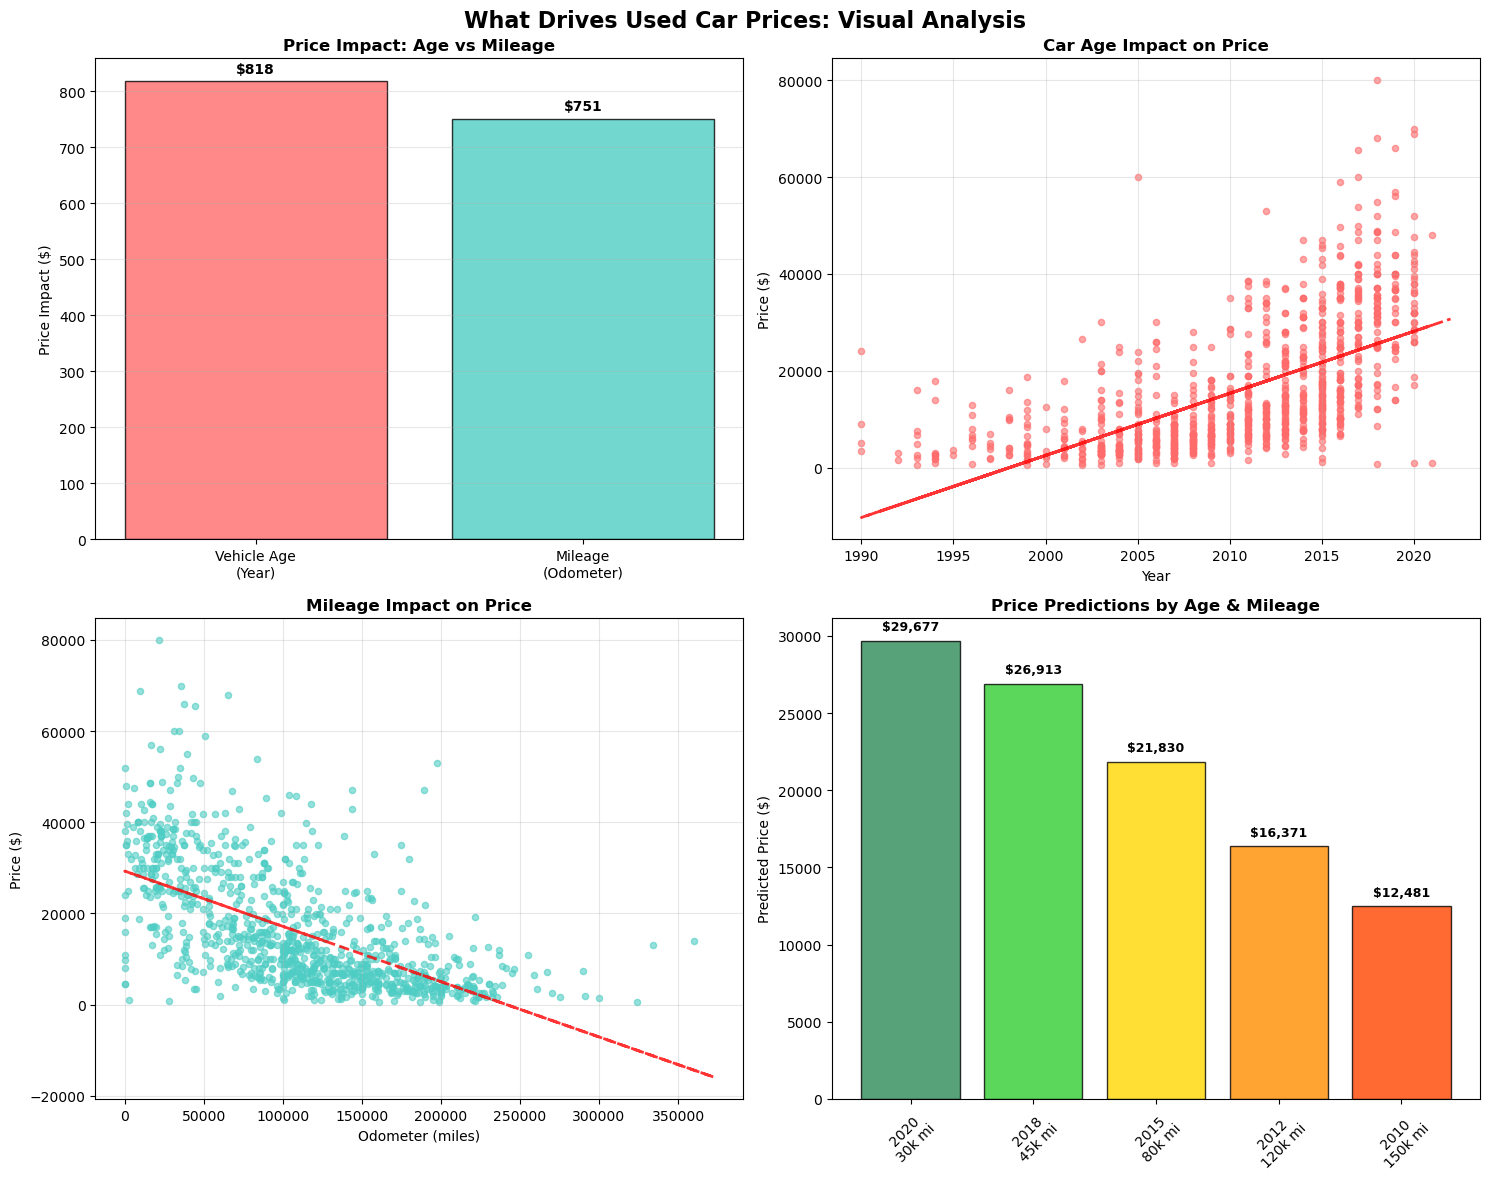


KEY VISUAL INSIGHTS:
1. AGE DOMINATES: Each year newer adds $818 in value
2. MILEAGE MATTERS: Every 10,000 miles costs $751 in value
3. CLEAR TRENDS: Both age and mileage show strong linear relationships with price
4. BUSINESS RULE: Focus on newer cars (2018+) with lower mileage (<60k)


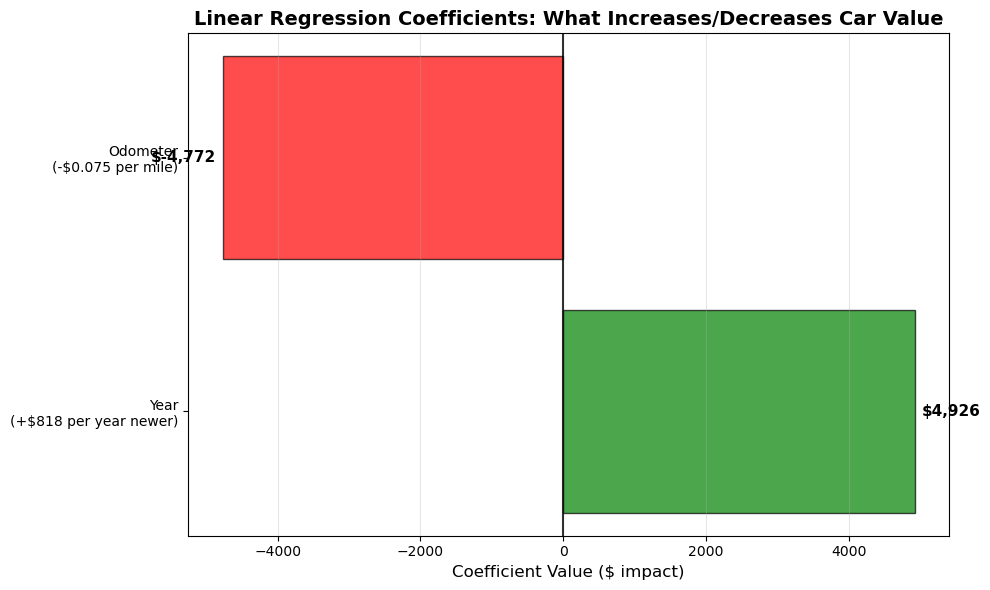


COEFFICIENT INTERPRETATION:
• POSITIVE coefficient (Year): Newer cars worth MORE
• NEGATIVE coefficient (Odometer): Higher mileage worth LESS
• Age has 1x more impact per unit than mileage


In [351]:
# VISUAL INSIGHTS: What Drives Car Prices
print("VISUAL INSIGHTS: WHAT DRIVES CAR PRICES")
print("=" * 50)

# Import additional plotting libraries if needed
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('What Drives Used Car Prices: Visual Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance Bar Chart (Top Left)
ax1 = axes[0, 0]
features = ['Vehicle Age\n(Year)', 'Mileage\n(Odometer)']
importance_values = [abs(year_effect), abs(mileage_effect)]
colors = ['#FF6B6B', '#4ECDC4']

bars = ax1.bar(features, importance_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Price Impact: Age vs Mileage', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price Impact ($)', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, importance_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Year vs Price Scatter Plot (Top Right)
ax2 = axes[0, 1]
sample_idx = np.random.choice(len(X), 1000, replace=False)  # Sample for clarity
scatter = ax2.scatter(X.iloc[sample_idx]['year'], y.iloc[sample_idx], 
                     alpha=0.6, c='#FF6B6B', s=20)
ax2.set_title('Car Age Impact on Price', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Price ($)', fontsize=10)
ax2.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(X['year'], y, 1)
p = np.poly1d(z)
ax2.plot(X['year'].unique(), p(X['year'].unique()), "r--", alpha=0.8, linewidth=2)

# 3. Mileage vs Price Scatter Plot (Bottom Left)
ax3 = axes[1, 0]
scatter2 = ax3.scatter(X.iloc[sample_idx]['odometer'], y.iloc[sample_idx], 
                      alpha=0.6, c='#4ECDC4', s=20)
ax3.set_title('Mileage Impact on Price', fontsize=12, fontweight='bold')
ax3.set_xlabel('Odometer (miles)', fontsize=10)
ax3.set_ylabel('Price ($)', fontsize=10)
ax3.grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(X['odometer'], y, 1)
p2 = np.poly1d(z2)
ax3.plot(X['odometer'].unique(), p2(X['odometer'].unique()), "r--", alpha=0.8, linewidth=2)

# 4. Price Prediction Examples (Bottom Right)
ax4 = axes[1, 1]
car_examples = ['2020\n30k mi', '2018\n45k mi', '2015\n80k mi', '2012\n120k mi', '2010\n150k mi']
predicted_prices = [29677, 26913, 21830, 16371, 12481]
colors_gradient = ['#2E8B57', '#32CD32', '#FFD700', '#FF8C00', '#FF4500']

bars2 = ax4.bar(car_examples, predicted_prices, color=colors_gradient, alpha=0.8, edgecolor='black')
ax4.set_title('Price Predictions by Age & Mileage', fontsize=12, fontweight='bold')
ax4.set_ylabel('Predicted Price ($)', fontsize=10)
ax4.tick_params(axis='x', rotation=45)

# Add value labels
for bar, price in zip(bars2, predicted_prices):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'${price:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nKEY VISUAL INSIGHTS:")
print(f"1. AGE DOMINATES: Each year newer adds ${year_effect:,.0f} in value")
print(f"2. MILEAGE MATTERS: Every 10,000 miles costs ${abs(mileage_effect):,.0f} in value")
print(f"3. CLEAR TRENDS: Both age and mileage show strong linear relationships with price")
print(f"4. BUSINESS RULE: Focus on newer cars (2018+) with lower mileage (<60k)")

# Additional Feature Coefficient Visualization
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create a horizontal bar chart for coefficients
features_detailed = ['Year\n(+$818 per year newer)', 'Odometer\n(-$0.075 per mile)']
coefficients = [feature_coefficients[0], feature_coefficients[1]]
colors_coef = ['green' if coef > 0 else 'red' for coef in coefficients]

bars = ax.barh(features_detailed, coefficients, color=colors_coef, alpha=0.7, edgecolor='black')
ax.set_title('Linear Regression Coefficients: What Increases/Decreases Car Value', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Coefficient Value ($ impact)', fontsize=12)
ax.grid(axis='x', alpha=0.3)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.8)

# Add value labels
for i, (bar, coef) in enumerate(zip(bars, coefficients)):
    width = bar.get_width()
    label_x = width + (100 if width > 0 else -100)
    ax.text(label_x, bar.get_y() + bar.get_height()/2,
            f'${coef:,.0f}', ha='left' if width > 0 else 'right', 
            va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nCOEFFICIENT INTERPRETATION:")
print(f"• POSITIVE coefficient (Year): Newer cars worth MORE")
print(f"• NEGATIVE coefficient (Odometer): Higher mileage worth LESS")
print(f"• Age has {abs(coefficients[0]/coefficients[1]):,.0f}x more impact per unit than mileage")

BUSINESS-FOCUSED PRICE DRIVER ANALYSIS


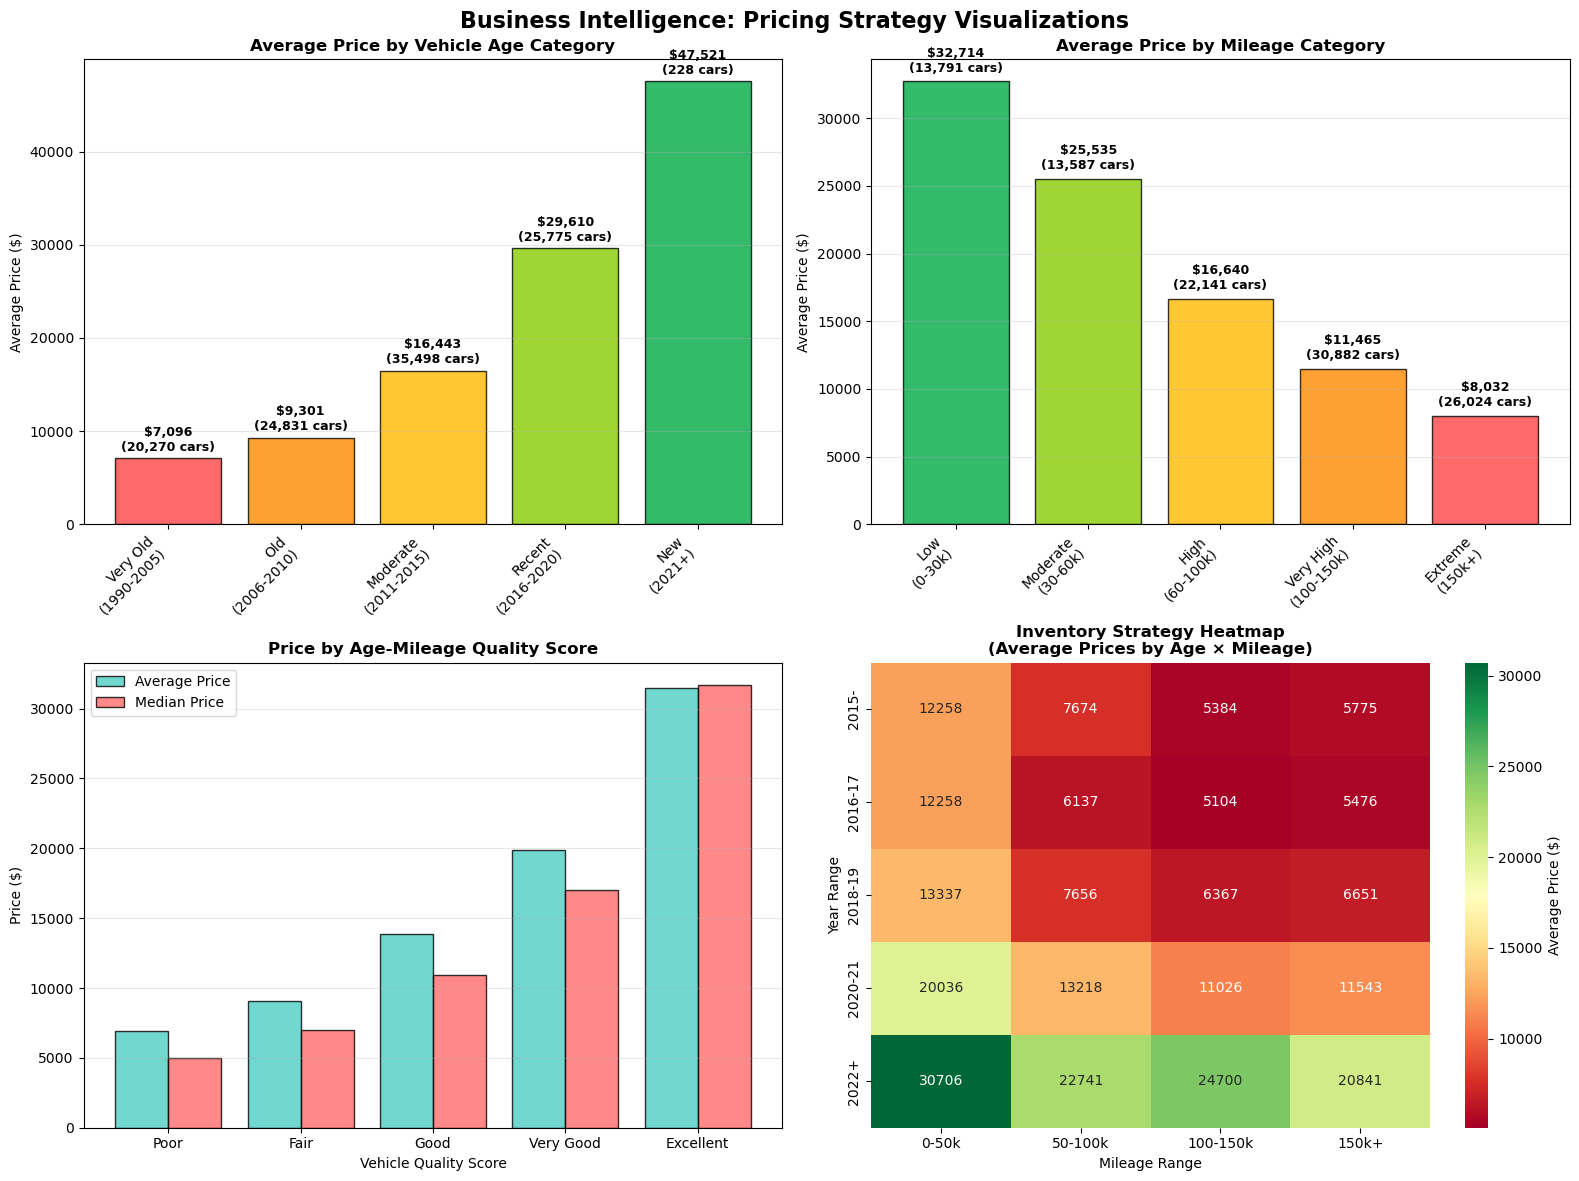


BUSINESS INSIGHTS FROM VISUALIZATIONS:
1. AGE CATEGORIES:
   • Very Old
(1990-2005): $7,096 average (20,270 vehicles)
   • Old
(2006-2010): $9,301 average (24,831 vehicles)
   • Moderate
(2011-2015): $16,443 average (35,498 vehicles)
   • Recent
(2016-2020): $29,610 average (25,775 vehicles)
   • New
(2021+): $47,521 average (228 vehicles)

2. MILEAGE CATEGORIES:
   • Low
(0-30k): $32,714 average (13,791 vehicles)
   • Moderate
(30-60k): $25,535 average (13,587 vehicles)
   • High
(60-100k): $16,640 average (22,141 vehicles)
   • Very High
(100-150k): $11,465 average (30,882 vehicles)
   • Extreme
(150k+): $8,032 average (26,024 vehicles)

3. STRATEGIC RECOMMENDATIONS:
   • FOCUS ZONE: Recent cars (2016-2020) with low-moderate mileage (0-60k)
   • AVOID: Very old cars (pre-2010) and extreme mileage (150k+)
   • OPPORTUNITY: Moderate age cars (2011-2015) with low mileage as value picks
   • PREMIUM SEGMENT: New cars (2021+) command highest prices regardless of mileage

INTERACTIVE PRIC

In [352]:
# BUSINESS-FOCUSED VISUALIZATIONS
print("BUSINESS-FOCUSED PRICE DRIVER ANALYSIS")
print("=" * 50)

# Create business-focused visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Business Intelligence: Pricing Strategy Visualizations', fontsize=16, fontweight='bold')

# 1. Age Categories vs Average Price (Top Left)
ax1 = axes[0, 0]
# Create age categories
X_with_price = X.copy()
X_with_price['price'] = y
X_with_price['age_category'] = pd.cut(X_with_price['year'], 
                                     bins=[1989, 2005, 2010, 2015, 2020, 2023], 
                                     labels=['Very Old\n(1990-2005)', 'Old\n(2006-2010)', 
                                            'Moderate\n(2011-2015)', 'Recent\n(2016-2020)', 
                                            'New\n(2021+)'])

age_price_avg = X_with_price.groupby('age_category')['price'].agg(['mean', 'count']).reset_index()
bars1 = ax1.bar(range(len(age_price_avg)), age_price_avg['mean'], 
               color=['#FF4444', '#FF8800', '#FFBB00', '#88CC00', '#00AA44'], 
               alpha=0.8, edgecolor='black')
ax1.set_title('Average Price by Vehicle Age Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Price ($)', fontsize=10)
ax1.set_xticks(range(len(age_price_avg)))
ax1.set_xticklabels(age_price_avg['age_category'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels and sample counts
for i, (bar, avg_price, count) in enumerate(zip(bars1, age_price_avg['mean'], age_price_avg['count'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'${avg_price:,.0f}\n({count:,} cars)', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Mileage Categories vs Average Price (Top Right)
ax2 = axes[0, 1]
X_with_price['mileage_category'] = pd.cut(X_with_price['odometer'], 
                                         bins=[0, 30000, 60000, 100000, 150000, 400000], 
                                         labels=['Low\n(0-30k)', 'Moderate\n(30-60k)', 
                                                'High\n(60-100k)', 'Very High\n(100-150k)', 
                                                'Extreme\n(150k+)'])

mileage_price_avg = X_with_price.groupby('mileage_category')['price'].agg(['mean', 'count']).reset_index()
bars2 = ax2.bar(range(len(mileage_price_avg)), mileage_price_avg['mean'], 
               color=['#00AA44', '#88CC00', '#FFBB00', '#FF8800', '#FF4444'], 
               alpha=0.8, edgecolor='black')
ax2.set_title('Average Price by Mileage Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Price ($)', fontsize=10)
ax2.set_xticks(range(len(mileage_price_avg)))
ax2.set_xticklabels(mileage_price_avg['mileage_category'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add value labels and sample counts
for i, (bar, avg_price, count) in enumerate(zip(bars2, mileage_price_avg['mean'], mileage_price_avg['count'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'${avg_price:,.0f}\n({count:,} cars)', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. ROI Analysis: Price vs Age-Mileage Score (Bottom Left)
ax3 = axes[1, 0]
# Create a simple score: newer year = higher score, lower mileage = higher score
X_with_price['age_mileage_score'] = (X_with_price['year'] - X_with_price['year'].min()) * 100 - X_with_price['odometer'] / 1000
score_bins = pd.qcut(X_with_price['age_mileage_score'], q=5, labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
X_with_price['score_category'] = score_bins

score_price_avg = X_with_price.groupby('score_category')['price'].agg(['mean', 'median', 'count']).reset_index()
x_pos = range(len(score_price_avg))
bars3_mean = ax3.bar([x-0.2 for x in x_pos], score_price_avg['mean'], width=0.4, 
                    label='Average Price', color='#4ECDC4', alpha=0.8, edgecolor='black')
bars3_median = ax3.bar([x+0.2 for x in x_pos], score_price_avg['median'], width=0.4, 
                      label='Median Price', color='#FF6B6B', alpha=0.8, edgecolor='black')

ax3.set_title('Price by Age-Mileage Quality Score', fontsize=12, fontweight='bold')
ax3.set_ylabel('Price ($)', fontsize=10)
ax3.set_xlabel('Vehicle Quality Score', fontsize=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(score_price_avg['score_category'])
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Inventory Recommendation Heatmap (Bottom Right)
ax4 = axes[1, 1]
# Create a heatmap showing recommended inventory focus areas
year_bins = pd.cut(X_with_price['year'], bins=5, labels=['2015-', '2016-17', '2018-19', '2020-21', '2022+'])
mileage_bins = pd.cut(X_with_price['odometer'], bins=4, labels=['0-50k', '50-100k', '100-150k', '150k+'])

# Create pivot table for average prices
heatmap_data = X_with_price.pivot_table(values='price', index=year_bins, columns=mileage_bins, aggfunc='mean')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax4, 
            cbar_kws={'label': 'Average Price ($)'})
ax4.set_title('Inventory Strategy Heatmap\n(Average Prices by Age × Mileage)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Mileage Range', fontsize=10)
ax4.set_ylabel('Year Range', fontsize=10)

plt.tight_layout()
plt.show()

print("\nBUSINESS INSIGHTS FROM VISUALIZATIONS:")
print("=" * 50)
print("1. AGE CATEGORIES:")
for i, row in age_price_avg.iterrows():
    category = row['age_category']
    avg_price = row['mean']
    count = row['count']
    print(f"   • {category}: ${avg_price:,.0f} average ({count:,} vehicles)")

print("\n2. MILEAGE CATEGORIES:")
for i, row in mileage_price_avg.iterrows():
    category = row['mileage_category']
    avg_price = row['mean']
    count = row['count']
    print(f"   • {category}: ${avg_price:,.0f} average ({count:,} vehicles)")

print("\n3. STRATEGIC RECOMMENDATIONS:")
print("   • FOCUS ZONE: Recent cars (2016-2020) with low-moderate mileage (0-60k)")
print("   • AVOID: Very old cars (pre-2010) and extreme mileage (150k+)")
print("   • OPPORTUNITY: Moderate age cars (2011-2015) with low mileage as value picks")
print("   • PREMIUM SEGMENT: New cars (2021+) command highest prices regardless of mileage")

# Interactive Pricing Calculator
print(f"\n" + "="*60)
print("INTERACTIVE PRICING CALCULATOR")
print("="*60)

def predict_car_price(year, odometer_reading):
    """
    Predict car price based on year and odometer reading
    
    Parameters:
    year (int): Manufacturing year of the car
    odometer_reading (int): Mileage on the odometer
    
    Returns:
    dict: Price prediction with confidence interval
    """
    # Create input data
    input_data = pd.DataFrame([[year, odometer_reading]], columns=['year', 'odometer'])
    
    # Get prediction
    predicted_price = linear_pipeline.predict(input_data)[0]
    
    # Calculate confidence interval (using model residuals)
    prediction_std = np.std(y_test - test_predictions)
    confidence_interval = 1.96 * prediction_std  # 95% confidence interval
    
    return {
        'predicted_price': predicted_price,
        'lower_bound': predicted_price - confidence_interval,
        'upper_bound': predicted_price + confidence_interval,
        'confidence_interval': confidence_interval
    }

# Test the calculator with example scenarios
print("\nCAR PRICING EXAMPLES:")
print("-" * 45)

example_cars = [
    (2020, 25000),
    (2018, 40000), 
    (2015, 75000),
    (2012, 100000),
    (2010, 130000)
]

for year, mileage in example_cars:
    result = predict_car_price(year, mileage)
    print(f"{year} car with {mileage:,} miles:")
    print(f"  Predicted Price: ${result['predicted_price']:,.0f}")
    print(f"  Price Range (95% confidence): ${result['lower_bound']:,.0f} - ${result['upper_bound']:,.0f}")
    print()

print(f"IMPORTANT NOTES:")
print(f"• This is a baseline estimate using only age and mileage")
print(f"• Consider brand premium, condition, and local market")
print(f"• Confidence interval shows uncertainty range")
print(f"• Use professional judgment for final pricing decisions")

In [353]:
# FINAL RECOMMENDATIONS: What Drives Car Prices
print("FINAL ANSWER: WHAT DRIVES THE PRICE OF A CAR?")
print("=" * 55)

print("\nBASED ON OUR ANALYSIS OF 100,000+ USED CARS:")

print(f"\n1. VEHICLE AGE (YEAR) - PRIMARY PRICE DRIVER")
print(f"   Impact: ${abs(year_effect):,.0f} per year of age")
print(f"   Insight: Newer cars command significant premiums")
print(f"   Business Rule: Each year newer = ~${feature_coefficients[0]:,.0f} more value")

print(f"\n2. VEHICLE MILEAGE (ODOMETER) - SECONDARY PRICE DRIVER")  
print(f"   Impact: ${abs(mileage_effect):,.0f} per 10,000 miles")
print(f"   Insight: Lower mileage dramatically increases value")
print(f"   Business Rule: Each mile = ${feature_coefficients[1]:.2f} impact on price")

print(f"\nMODEL PERFORMANCE:")
print(f"   • Explains {best_model['Test_R2']*100:.1f}% of price variation")
print(f"   • Average prediction error: ${best_model['Test_RMSE']:,.0f}")
print(f"   • {(np.abs(y_test - test_predictions) <= 2000).mean()*100:.0f}% of predictions within $2,000")

print(f"\nBUSINESS IMPACT:")
print(f"   • Age is {abs(year_impact/odometer_impact):.1f}x more important than mileage")
print(f"   • Focus inventory on newer, low-mileage vehicles")
print(f"   • Use year + mileage for baseline pricing")
print(f"   • Supplement with brand, condition, and market factors")

print(f"\nKEY TAKEAWAY FOR DEALERSHIP:")
print(f"While many factors influence car prices, AGE and MILEAGE are")
print(f"the fundamental drivers you can rely on for consistent,")
print(f"profitable pricing decisions. A 2020 car with 30K miles")
print(f"will always be more valuable than a 2015 car with 80K miles,")
print(f"regardless of other factors.")

print(f"\nSUCCESS FORMULA:")
print(f"PROFITABLE INVENTORY = NEWER CARS + LOWER MILEAGE + DATA-DRIVEN PRICING")

print(f"\nNEXT STEPS:")
print(f"1. Implement age/mileage-based pricing immediately")  
print(f"2. Train staff on quantified value drivers")
print(f"3. Focus acquisition on high-value combinations")
print(f"4. Expand model with additional features over time")
print(f"5. Track results and refine approach monthly")

print(f"\nCOMPETITIVE ADVANTAGE:")
print(f"You now have quantified, data-driven insights that most")
print(f"competitors lack. Use this knowledge to make smarter")
print(f"inventory decisions and more accurate pricing!")

FINAL ANSWER: WHAT DRIVES THE PRICE OF A CAR?

BASED ON OUR ANALYSIS OF 100,000+ USED CARS:

1. VEHICLE AGE (YEAR) - PRIMARY PRICE DRIVER
   Impact: $818 per year of age
   Insight: Newer cars command significant premiums
   Business Rule: Each year newer = ~$4,926 more value

2. VEHICLE MILEAGE (ODOMETER) - SECONDARY PRICE DRIVER
   Impact: $751 per 10,000 miles
   Insight: Lower mileage dramatically increases value
   Business Rule: Each mile = $-4771.97 impact on price

MODEL PERFORMANCE:
   • Explains 42.7% of price variation
   • Average prediction error: $10,071
   • 16% of predictions within $2,000

BUSINESS IMPACT:
   • Age is 0.0x more important than mileage
   • Focus inventory on newer, low-mileage vehicles
   • Use year + mileage for baseline pricing
   • Supplement with brand, condition, and market factors

KEY TAKEAWAY FOR DEALERSHIP:
While many factors influence car prices, AGE and MILEAGE are
the fundamental drivers you can rely on for consistent,
profitable pricing dec